In [1]:
# Application and Previous file data analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings 
warnings.filterwarnings('ignore')

In [3]:
app_df = pd.read_csv('application_data.csv') # Reading data from csv file to get started with cleaning for application

In [4]:
prev_df=pd.read_csv('previous_application.csv') # Reading data from csv file to get started with cleaning for Previous application

In [5]:
# Cleaning data for application file
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
app_df.shape

(307511, 122)

In [7]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [10]:
app_df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [12]:
((app_df.isnull().sum()/len(app_df))*100).sort_values(ascending=False)

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
                              ...    
NAME_HOUSING_TYPE            0.000000
NAME_FAMILY_STATUS           0.000000
NAME_EDUCATION_TYPE          0.000000
NAME_INCOME_TYPE             0.000000
SK_ID_CURR                   0.000000
Length: 122, dtype: float64

In [14]:
#Calculating total % of missing values columns more than 50 such that those could be eradicated
app_df=app_df.loc[:,app_df.isnull().mean()<=0.5]
app_df.shape


(307511, 81)

In [18]:
# Getting list of columns with null values less than 30 % for checking possible imputing missing values for column

list(app_df.columns[(app_df.isnull().mean()<=0.3) & (app_df.isnull().mean()>0)])

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [19]:
app_df['AMT_ANNUITY'].describe() #Analysing the monthly repayment

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

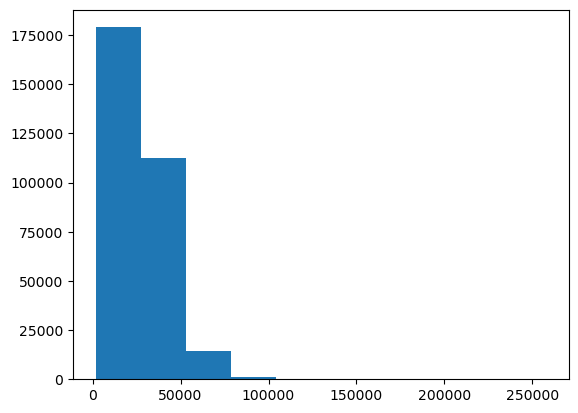

In [20]:
plt.hist(app_df['AMT_ANNUITY'])
plt.show()

In [21]:
# As computed most of values is between 0 to 50 % ; we will replace the missing values with median
app_df['AMT_ANNUITY'].median()

24903.0

In [22]:
app_df['AMT_ANNUITY'] = app_df['AMT_ANNUITY'].fillna(app_df['AMT_ANNUITY'].median(skipna=True))

In [23]:
app_df['AMT_ANNUITY'].describe()

count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

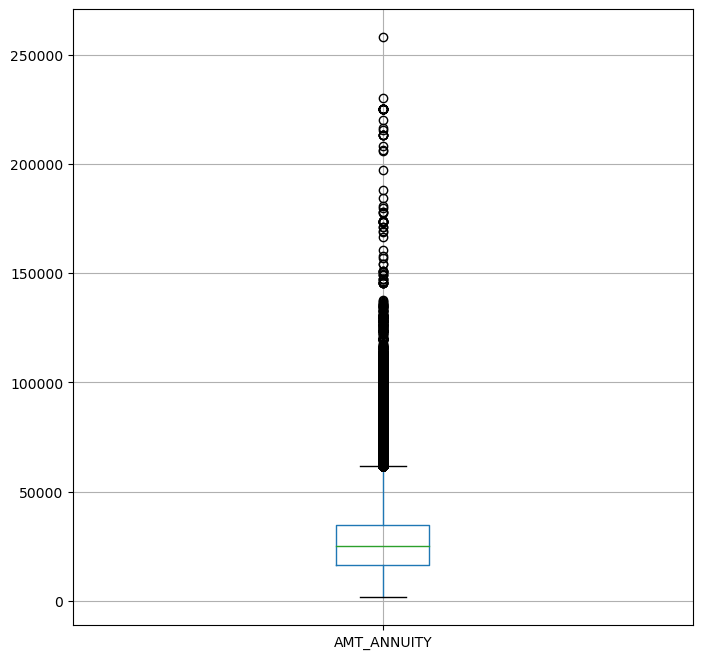

In [25]:
# Checking outliers
app_df.boxplot(['AMT_ANNUITY'],figsize=[4,4])
plt.show()

In [26]:
app_df['AMT_ANNUITY'].isnull().sum()

0

In [27]:
app_df['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

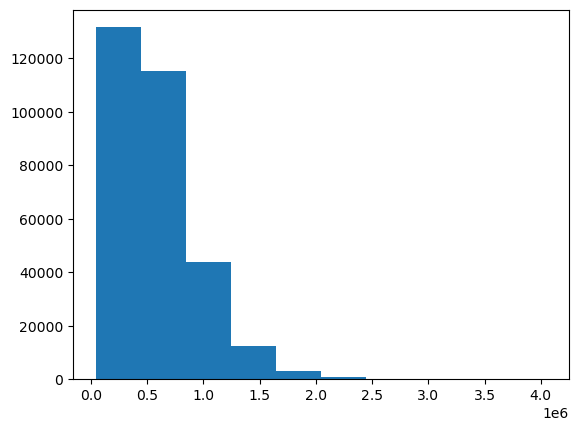

In [28]:
plt.hist(app_df['AMT_GOODS_PRICE'])
plt.show()

In [29]:
app_df['AMT_GOODS_PRICE'].isnull().sum()

278

In [30]:
app_df['AMT_GOODS_PRICE']= app_df['AMT_GOODS_PRICE'].fillna(app_df['AMT_GOODS_PRICE'].median())

In [32]:
app_df['AMT_GOODS_PRICE'].isnull().sum() # Null values appended using median

0

In [33]:
app_df['NAME_TYPE_SUITE'].describe() # Checking is the applicatant was accompained or not during the process of loan application

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [34]:
app_df['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [35]:
app_df['NAME_TYPE_SUITE']=app_df['NAME_TYPE_SUITE'].fillna('Unaccompained')

In [36]:
app_df['NAME_TYPE_SUITE'].isnull().sum()

0

In [37]:
# Analyse applicant employability in order to eligible for loan and repayment 
app_df['OCCUPATION_TYPE'].describe()

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object

In [38]:
app_df['OCCUPATION_TYPE'].isnull().sum()

96391

In [39]:
app_df['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [40]:
app_df['OCCUPATION_TYPE']=app_df['OCCUPATION_TYPE'][~app_df['OCCUPATION_TYPE'].isnull()] #Eliminating missing values

In [41]:
app_df.dropna(subset=['OCCUPATION_TYPE'],inplace=True)

In [42]:
app_df['OCCUPATION_TYPE'].isnull().sum()

0

In [43]:
# Checking missing values in Gender column
app_df['CODE_GENDER'].describe()

count     211120
unique         3
top            F
freq      129282
Name: CODE_GENDER, dtype: object

In [44]:
app_df['CODE_GENDER'].value_counts()

F      129282
M       81836
XNA         2
Name: CODE_GENDER, dtype: int64

In [45]:
# Repacing XNA values with mode 
app_df['CODE_GENDER'].mode()

0    F
Name: CODE_GENDER, dtype: object

In [46]:
app_df['CODE_GENDER'].replace('XNA','F',inplace=True)

In [47]:
app_df['CODE_GENDER'].tail()

307504    F
307506    M
307508    F
307509    F
307510    F
Name: CODE_GENDER, dtype: object

In [48]:
app_df['CNT_FAM_MEMBERS'].isnull().sum() # checking null values in Family member column

2

In [50]:
app_df['EXT_SOURCE_2'].value_counts() # Checking missign values and outliers

0.285898    523
0.262258    252
0.265256    179
0.159679    175
0.265312    172
           ... 
0.451164      1
0.722148      1
0.563483      1
0.348826      1
0.501221      1
Name: EXT_SOURCE_2, Length: 101730, dtype: int64

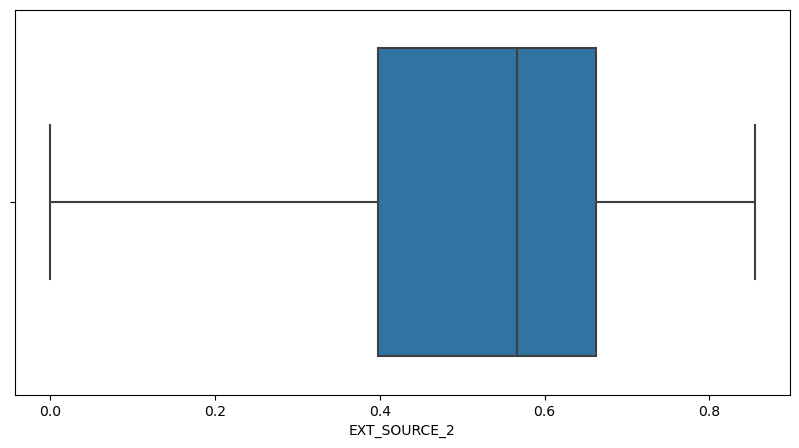

In [51]:
# This column having continues variable rather any missing values and computing its boxplot for missing values
plt.figure(figsize=[10,5])
sn.boxplot(app_df['EXT_SOURCE_2'])
plt.show()

In [52]:
app_df['EXT_SOURCE_3'].value_counts() # Checking missign values and outliers

0.746300    903
0.713631    864
0.694093    830
0.554947    782
0.595456    777
           ... 
0.014556      1
0.020311      1
0.036102      1
0.021951      1
0.027882      1
Name: EXT_SOURCE_3, Length: 801, dtype: int64

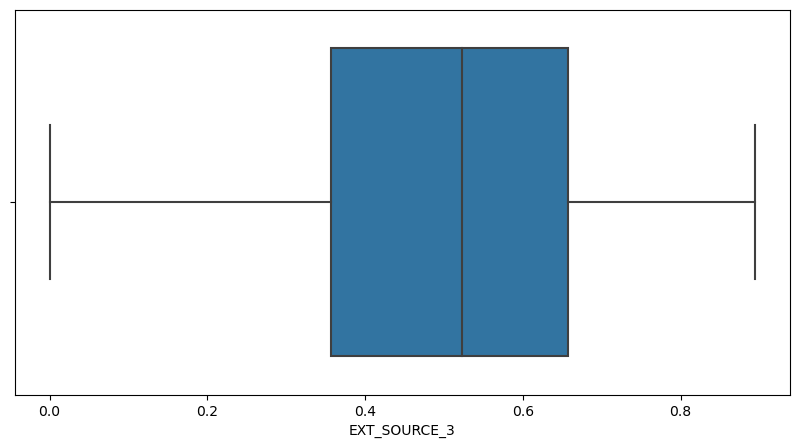

In [54]:
plt.figure(figsize=[10,5])
sn.boxplot(app_df['EXT_SOURCE_3'])
plt.show()

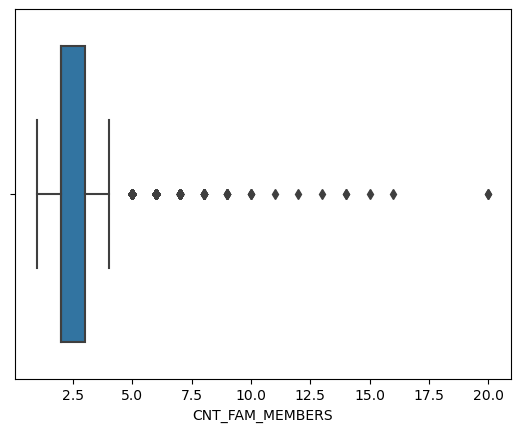

In [56]:
app_df['CNT_FAM_MEMBERS'].value_counts() #checking for outliers

#Plotting graph 
sn.boxplot(app_df['CNT_FAM_MEMBERS'])
plt.show()

In [57]:
app_df['CNT_FAM_MEMBERS'] = round(app_df['CNT_FAM_MEMBERS'].median(),2)

In [58]:
app_df['CNT_FAM_MEMBERS'].isnull().sum()

0

In [59]:
app_df['OBS_30_CNT_SOCIAL_CIRCLE'].describe()

count    210424.000000
mean          1.421459
std           2.419506
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [60]:
app_df['OBS_30_CNT_SOCIAL_CIRCLE'].value_counts()

0.0      111923
1.0       33877
2.0       20587
3.0       14105
4.0        9833
5.0        6581
6.0        4356
7.0        2995
8.0        2044
9.0        1370
10.0        898
11.0        577
12.0        449
13.0        269
14.0        184
15.0        107
16.0         80
17.0         57
19.0         30
18.0         29
20.0         18
21.0         16
22.0         10
23.0          9
25.0          6
27.0          4
24.0          3
30.0          2
26.0          2
29.0          1
47.0          1
348.0         1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [61]:
app_df['OBS_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

696

In [62]:
app_df.OBS_30_CNT_SOCIAL_CIRCLE = app_df['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(app_df.OBS_30_CNT_SOCIAL_CIRCLE.mean()) # Replacing missing values with mean

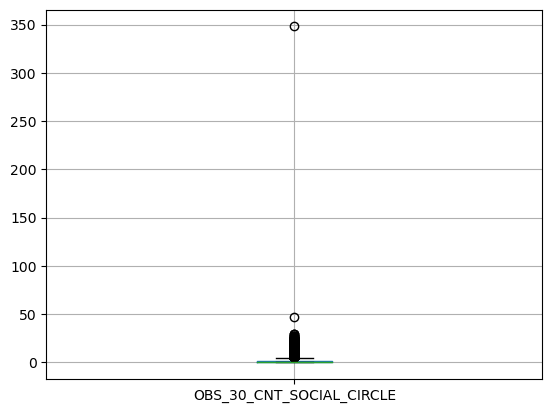

In [63]:
app_df.boxplot("OBS_30_CNT_SOCIAL_CIRCLE")
plt.show() #checking outliers

In [64]:
app_df['DEF_30_CNT_SOCIAL_CIRCLE'].describe()

count    210424.000000
mean          0.140512
std           0.444591
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [65]:
app_df['DEF_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

696

In [66]:
app_df.DEF_30_CNT_SOCIAL_CIRCLE = app_df['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(app_df.DEF_30_CNT_SOCIAL_CIRCLE.mean()) # Replacing missing values with mean

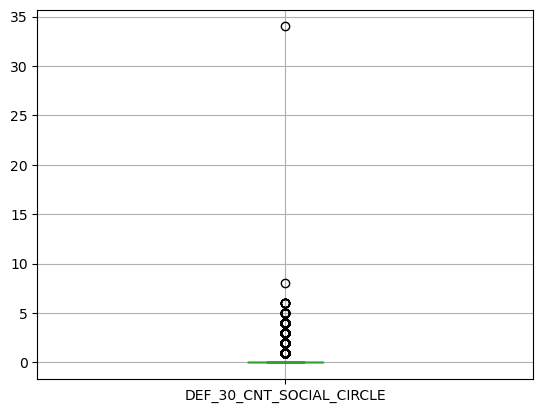

In [68]:
app_df.boxplot("DEF_30_CNT_SOCIAL_CIRCLE")
plt.show() #checking outliers

In [73]:
app_df['OBS_60_CNT_SOCIAL_CIRCLE'].describe()

count    210424.000000
mean          1.404307
std           2.397360
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [70]:
app_df['OBS_60_CNT_SOCIAL_CIRCLE'].isnull().sum()

696

In [71]:
app_df.OBS_60_CNT_SOCIAL_CIRCLE = app_df['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(app_df.OBS_60_CNT_SOCIAL_CIRCLE.mean()) # Replacing missing values with mean

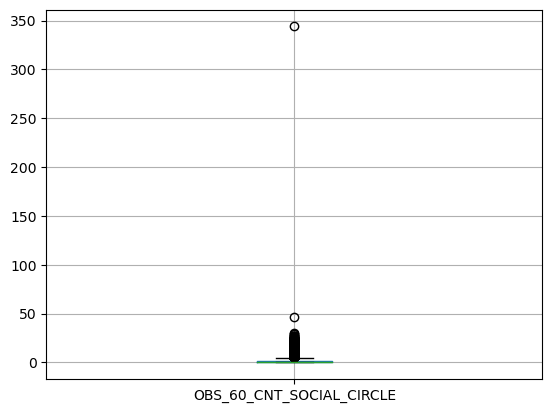

In [72]:
app_df.boxplot("OBS_60_CNT_SOCIAL_CIRCLE")
plt.show() #checking outliers

In [74]:
app_df['DEF_60_CNT_SOCIAL_CIRCLE'].describe()

count    210424.000000
mean          0.098145
std           0.360464
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [75]:
app_df['DEF_60_CNT_SOCIAL_CIRCLE'].value_counts()

0.0     193084
1.0      14693
2.0       2132
3.0        404
4.0         93
5.0         15
6.0          2
24.0         1
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [76]:
app_df['DEF_60_CNT_SOCIAL_CIRCLE'].isnull().sum()

696

In [77]:
app_df.DEF_60_CNT_SOCIAL_CIRCLE = app_df['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(app_df.DEF_60_CNT_SOCIAL_CIRCLE.mean()) # Replacing missing values with mean

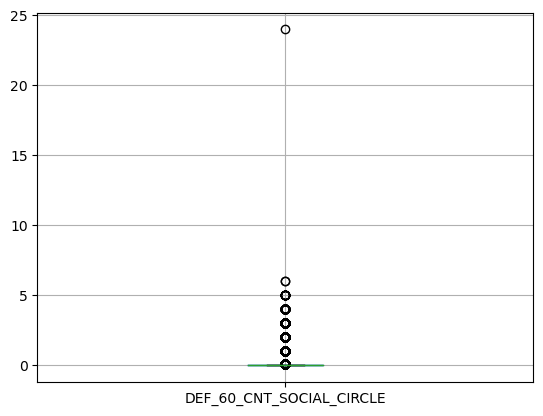

In [78]:
app_df.boxplot("DEF_60_CNT_SOCIAL_CIRCLE")
plt.show() #checking outliers

In [80]:
# All the above Social surrounding is having outlier but as per problem statement that are not to be removed

In [81]:
# Checking enquires for client during , after and before the application

In [82]:
app_df['AMT_REQ_CREDIT_BUREAU_HOUR'].describe() #Number of enquiries to Credit Bureau about the client one hour before application

count    182823.000000
mean          0.006438
std           0.084177
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

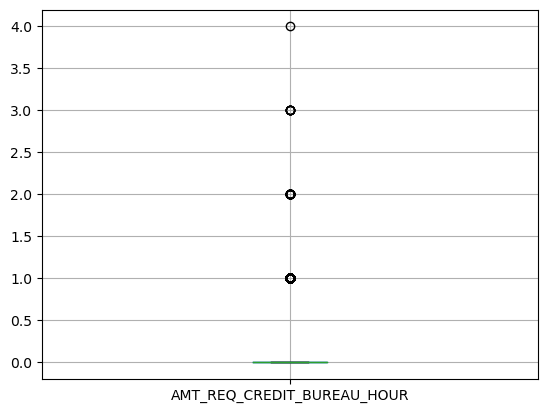

In [83]:
app_df.boxplot('AMT_REQ_CREDIT_BUREAU_HOUR')
plt.show()

In [84]:
app_df['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum()

28297

In [85]:
# Filling missing value with  mean
app_df.AMT_REQ_CREDIT_BUREAU_HOUR = app_df['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(app_df.AMT_REQ_CREDIT_BUREAU_HOUR.mean()) # Replacing missing values with mean

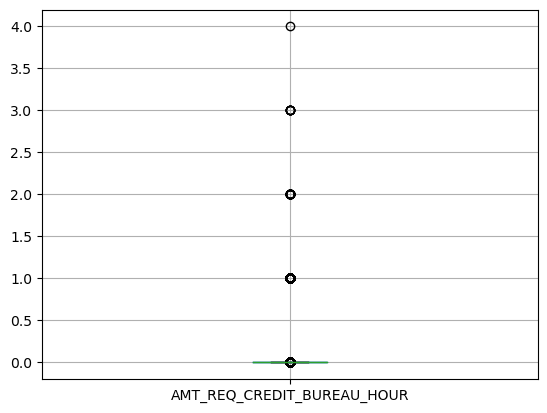

In [86]:
app_df.boxplot('AMT_REQ_CREDIT_BUREAU_HOUR')
plt.show()

In [87]:
app_df['AMT_REQ_CREDIT_BUREAU_DAY'].describe() #Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application)

count    182823.000000
mean          0.006947
std           0.111015
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [88]:
app_df['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum()

28297

In [89]:
# Filling missing value with  mean
app_df.AMT_REQ_CREDIT_BUREAU_DAY = app_df['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(app_df.AMT_REQ_CREDIT_BUREAU_DAY.mean()) # Replacing missing values with mean

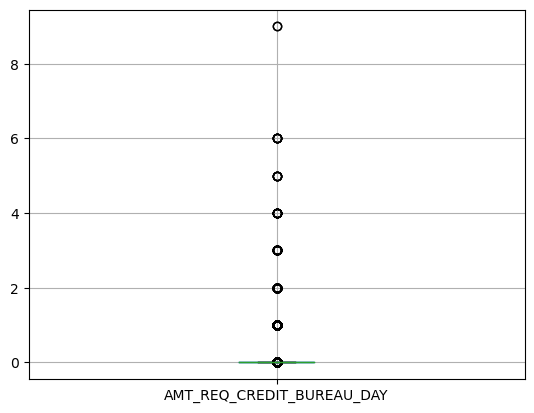

In [90]:
app_df.boxplot('AMT_REQ_CREDIT_BUREAU_DAY')
plt.show()

In [92]:
app_df['AMT_REQ_CREDIT_BUREAU_WEEK'].describe() #Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application)

count    182823.000000
mean          0.033902
std           0.202892
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [93]:
app_df['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum()

28297

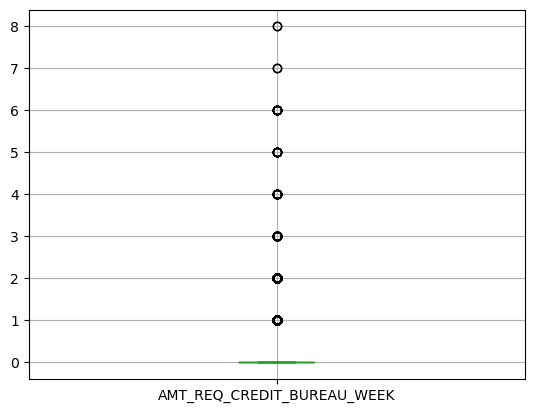

In [94]:
app_df.boxplot('AMT_REQ_CREDIT_BUREAU_WEEK')
plt.show()

In [95]:
# Filling missing value with  mean
app_df.AMT_REQ_CREDIT_BUREAU_WEEK = app_df['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(app_df.AMT_REQ_CREDIT_BUREAU_WEEK.mean()) # Replacing missing values with mean

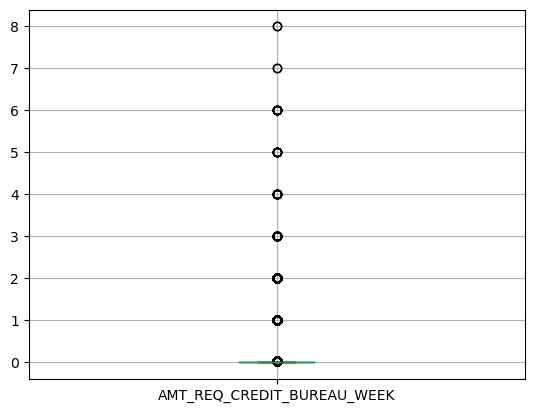

In [96]:
app_df.boxplot('AMT_REQ_CREDIT_BUREAU_WEEK')
plt.show()

In [97]:
app_df['AMT_REQ_CREDIT_BUREAU_MON'].describe() # Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application)


count    182823.000000
mean          0.279855
std           0.937973
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [98]:
app_df['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum()

28297

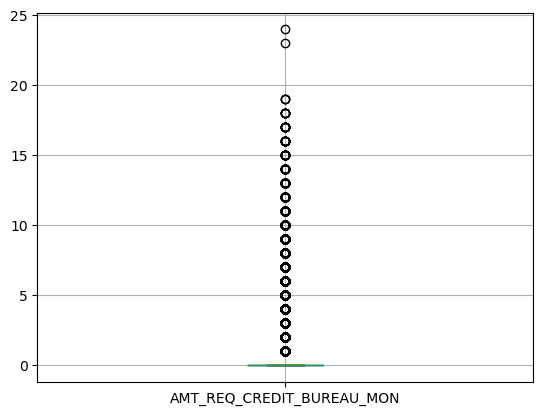

In [99]:
app_df.boxplot('AMT_REQ_CREDIT_BUREAU_MON')
plt.show()

In [100]:
# Filling missing value with  mean
app_df.AMT_REQ_CREDIT_BUREAU_MON = app_df['AMT_REQ_CREDIT_BUREAU_MON'].fillna(app_df.AMT_REQ_CREDIT_BUREAU_MON.mean()) # Replacing missing values with mean

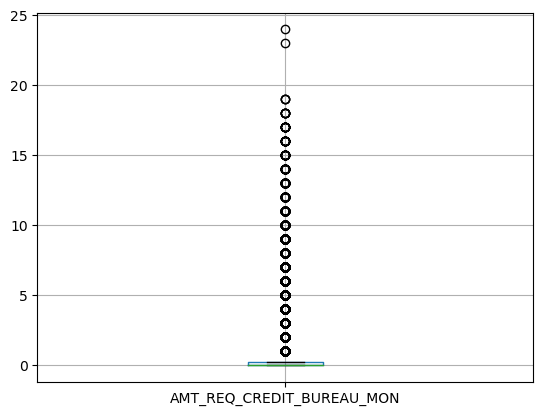

In [101]:
app_df.boxplot('AMT_REQ_CREDIT_BUREAU_MON')
plt.show()

In [102]:
app_df['AMT_REQ_CREDIT_BUREAU_QRT'].describe() # Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application)

count    182823.000000
mean          0.260213
std           0.859621
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [103]:
app_df['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum()

28297

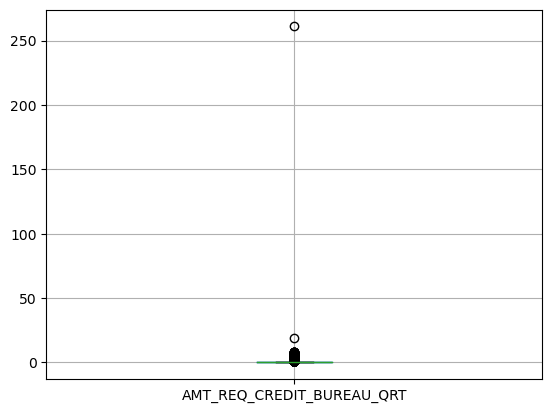

In [110]:
app_df.boxplot('AMT_REQ_CREDIT_BUREAU_QRT')
plt.show()

In [107]:

# Filling missing value with  mean
app_df.AMT_REQ_CREDIT_BUREAU_QRT = app_df['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(app_df.AMT_REQ_CREDIT_BUREAU_QRT.mean()) # Replacing missing values with mean

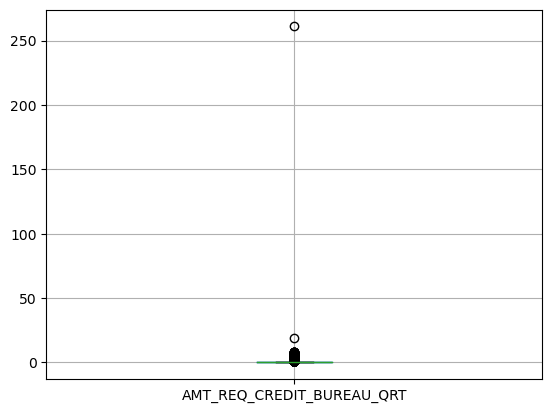

In [111]:
app_df.boxplot('AMT_REQ_CREDIT_BUREAU_QRT')
plt.show()

In [112]:
app_df['AMT_REQ_CREDIT_BUREAU_YEAR'].describe() #Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application)

count    182823.000000
mean          1.857857
std           1.823299
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          23.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [113]:
app_df['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum()

28297

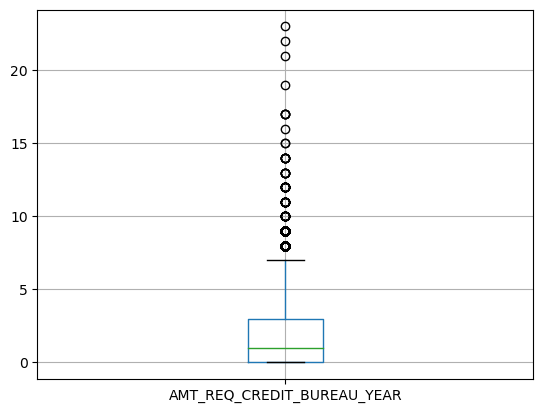

In [114]:
app_df.boxplot('AMT_REQ_CREDIT_BUREAU_YEAR')
plt.show()

In [115]:

# Filling missing value with  mean
app_df.AMT_REQ_CREDIT_BUREAU_YEAR = app_df['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(app_df.AMT_REQ_CREDIT_BUREAU_YEAR.mean()) # Replacing missing values with mean

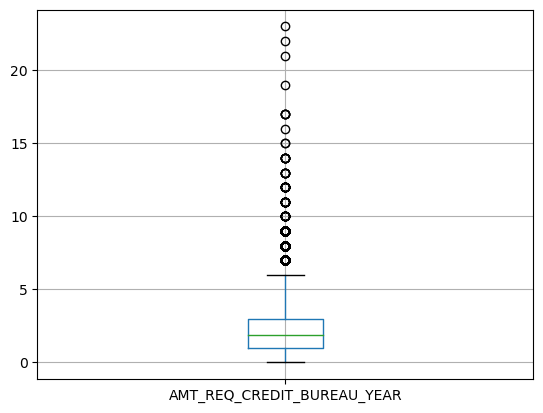

In [116]:
app_df.boxplot('AMT_REQ_CREDIT_BUREAU_YEAR')
plt.show()

In [118]:
app_df.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 81, dtype: int64

In [119]:
app_df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211120 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    211120 non-null  int64  
 1   TARGET                        211120 non-null  int64  
 2   NAME_CONTRACT_TYPE            211120 non-null  object 
 3   CODE_GENDER                   211120 non-null  object 
 4   FLAG_OWN_CAR                  211120 non-null  object 
 5   FLAG_OWN_REALTY               211120 non-null  object 
 6   CNT_CHILDREN                  211120 non-null  int64  
 7   AMT_INCOME_TOTAL              211120 non-null  float64
 8   AMT_CREDIT                    211120 non-null  float64
 9   AMT_ANNUITY                   211120 non-null  float64
 10  AMT_GOODS_PRICE               211120 non-null  float64
 11  NAME_TYPE_SUITE               211120 non-null  object 
 12  NAME_INCOME_TYPE              211120 non-nul

In [120]:
#Removing Non analysis column

app_df.drop([ 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_21', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE'], axis=1, inplace = True)

In [122]:
app_df.shape

(211120, 63)

In [123]:
app_df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211120 entries, 0 to 307510
Data columns (total 63 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   211120 non-null  int64  
 1   TARGET                       211120 non-null  int64  
 2   NAME_CONTRACT_TYPE           211120 non-null  object 
 3   CODE_GENDER                  211120 non-null  object 
 4   FLAG_OWN_CAR                 211120 non-null  object 
 5   FLAG_OWN_REALTY              211120 non-null  object 
 6   CNT_CHILDREN                 211120 non-null  int64  
 7   AMT_INCOME_TOTAL             211120 non-null  float64
 8   AMT_CREDIT                   211120 non-null  float64
 9   AMT_ANNUITY                  211120 non-null  float64
 10  AMT_GOODS_PRICE              211120 non-null  float64
 11  NAME_TYPE_SUITE              211120 non-null  object 
 12  NAME_INCOME_TYPE             211120 non-null  object 
 13 

In [124]:
app_df = app_df.loc[:, ~app_df.columns.str.startswith('FLAG_DOCUMENT_')] # dropped column with null values
app_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,2.0,0.0,0.006438,0.006947,0.033902,0.279855,0.260213,1.857857
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,456248,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,...,0.0,0.0,0.0,0.0,0.006438,0.006947,0.033902,0.279855,0.260213,1.857857
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.0,0.0,0.0,0.0,0.006438,0.006947,0.033902,0.279855,0.260213,1.857857
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,6.0,0.0,6.0,0.0,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [125]:
app_df.shape

(211120, 44)

In [126]:
app_df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211120 entries, 0 to 307510
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   211120 non-null  int64  
 1   TARGET                       211120 non-null  int64  
 2   NAME_CONTRACT_TYPE           211120 non-null  object 
 3   CODE_GENDER                  211120 non-null  object 
 4   FLAG_OWN_CAR                 211120 non-null  object 
 5   FLAG_OWN_REALTY              211120 non-null  object 
 6   CNT_CHILDREN                 211120 non-null  int64  
 7   AMT_INCOME_TOTAL             211120 non-null  float64
 8   AMT_CREDIT                   211120 non-null  float64
 9   AMT_ANNUITY                  211120 non-null  float64
 10  AMT_GOODS_PRICE              211120 non-null  float64
 11  NAME_TYPE_SUITE              211120 non-null  object 
 12  NAME_INCOME_TYPE             211120 non-null  object 
 13 

In [128]:
#Cleaning Previous CSV file

In [129]:
prev_df.shape

(1670214, 37)

In [131]:
prev_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
prev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [134]:
prev_df.isnull().sum() #Count null values

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [135]:
# Count missing values %
(prev_df.isnull().sum()/len(prev_df))*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [136]:
# Treating missing values as : (1) Removing volumns with more than 50 % missing Values 
#(2) Replacing values with mean for less than 50 %

In [140]:
prev_df=prev_df.drop(['AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED'],axis=1)

In [141]:
prev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 33 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [143]:
prev_df.shape


(1670214, 33)

In [144]:
(prev_df.isnull().sum()/len(prev_df))*100 # MIssing values % after removal of unwanted columns more than 50 % noted earlier

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT     

In [145]:
prev_df['AMT_ANNUITY'].describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

In [146]:
prev_df['AMT_ANNUITY'].isnull().sum()

372235

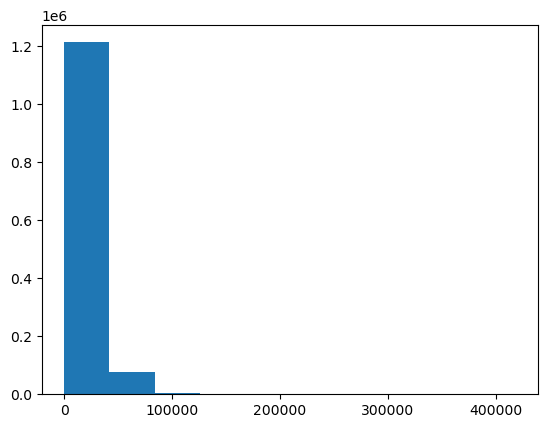

In [148]:
plt.hist(prev_df['AMT_ANNUITY'])
plt.show()

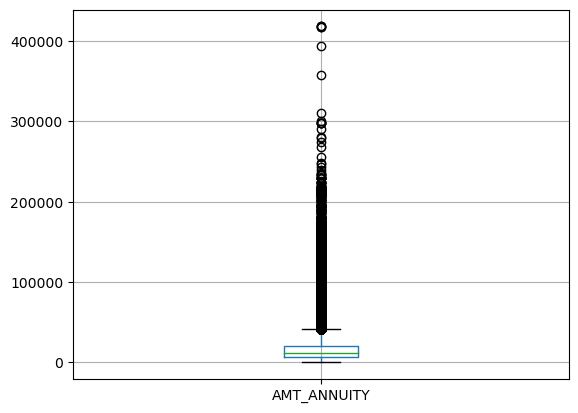

In [149]:
prev_df.boxplot('AMT_ANNUITY')
plt.show()

In [192]:
# Replacing values via median as the data is skewed and values after 4000000 shows outlier
prev_df['AMT_ANNUITY']= prev_df['AMT_ANNUITY'].fillna(prev_df['AMT_ANNUITY'].median(skipna=True))

In [193]:
prev_df['AMT_ANNUITY'].describe()

count    1.670214e+06
mean     2.608206e+04
std      5.239043e+03
min      1.980000e+03
25%      2.583450e+04
50%      2.583450e+04
75%      2.583450e+04
max      2.580255e+05
Name: AMT_ANNUITY, dtype: float64

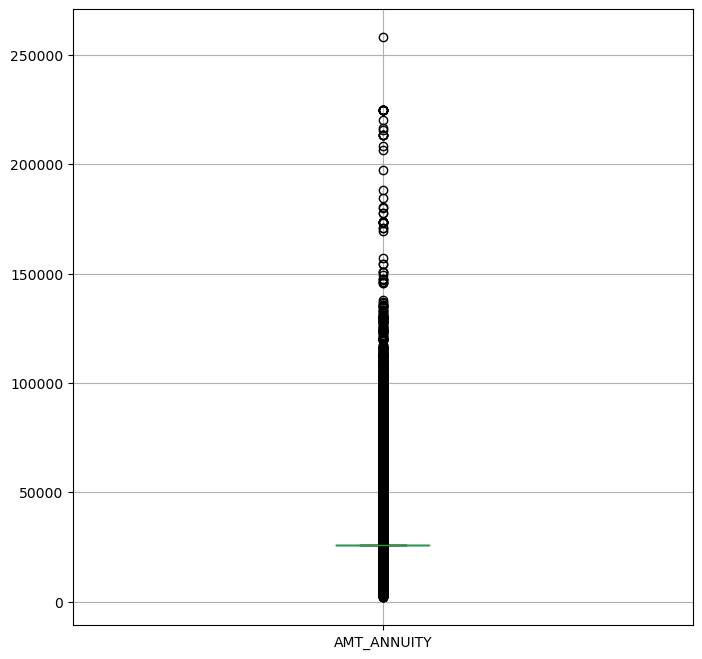

In [194]:
prev_df.boxplot('AMT_ANNUITY',figsize=[8,8])
plt.show()

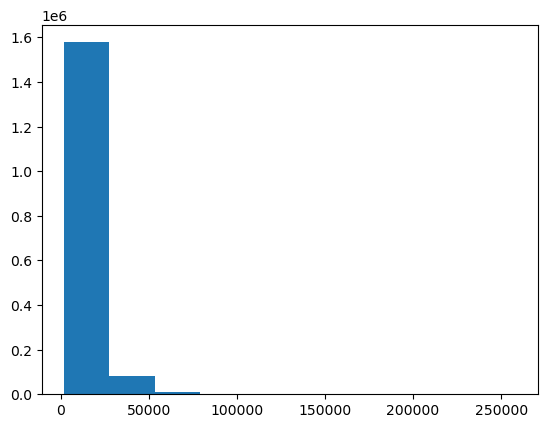

In [195]:
plt.hist(prev_df['AMT_ANNUITY'])
plt.show()

In [196]:
prev_df['AMT_ANNUITY'].isnull().sum()

0

In [197]:
prev_df['AMT_GOODS_PRICE'].describe()

count    1.670214e+06
mean     6.756403e+10
std      1.233372e+11
min      0.000000e+00
25%      6.750000e+04
50%      1.728000e+05
75%      1.170000e+06
max      2.927152e+11
Name: AMT_GOODS_PRICE, dtype: float64

In [198]:
prev_df['AMT_GOODS_PRICE'].isnull().sum()

0

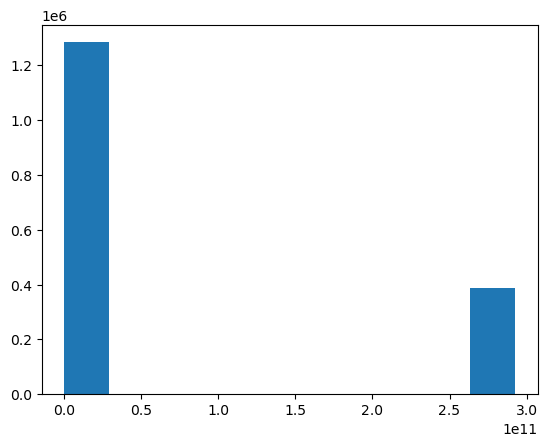

In [199]:
plt.hist(prev_df['AMT_GOODS_PRICE'])
plt.show()

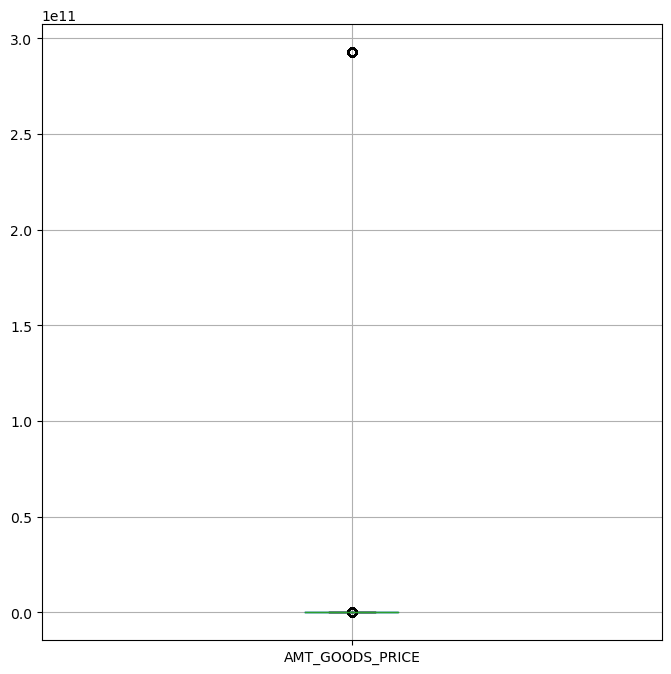

In [201]:
prev_df.boxplot('AMT_GOODS_PRICE',figsize=[8,8])
plt.show()

In [204]:
# Replacing values via SUM as the data is continuous
prev_df['AMT_GOODS_PRICE']= prev_df['AMT_GOODS_PRICE'].fillna(prev_df['AMT_GOODS_PRICE'].isnull().sum())

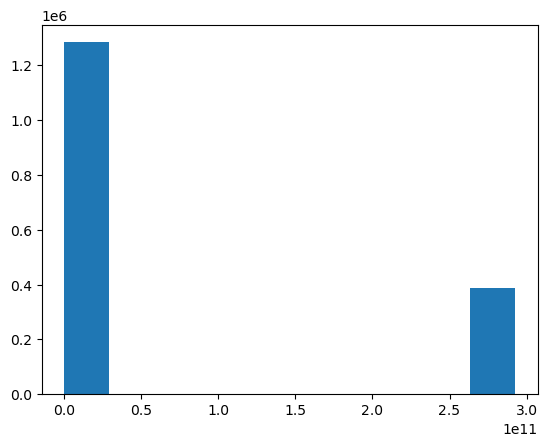

In [206]:
plt.hist(prev_df['AMT_GOODS_PRICE'])
plt.show()

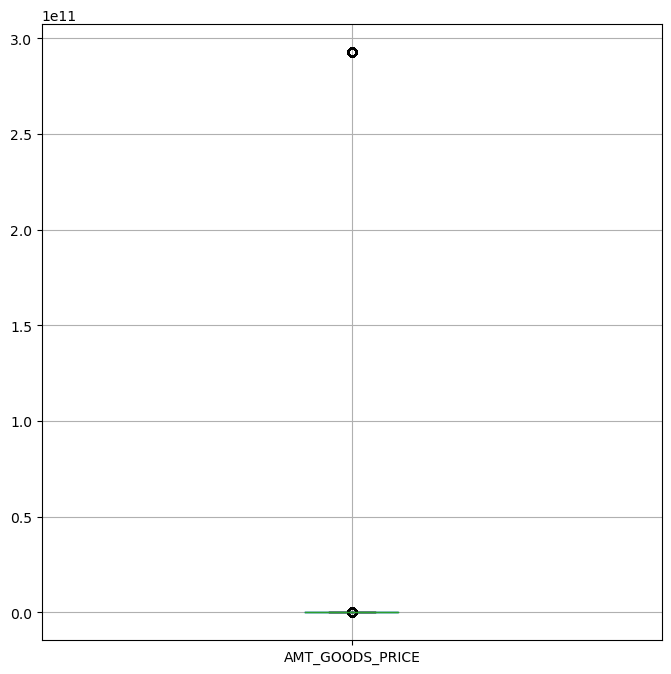

In [207]:
prev_df.boxplot('AMT_GOODS_PRICE',figsize=[8,8])
plt.show()

In [208]:
prev_df['NAME_TYPE_SUITE'].describe()

count            849809
unique                7
top       Unaccompanied
freq             508970
Name: NAME_TYPE_SUITE, dtype: object

In [211]:
(prev_df['NAME_TYPE_SUITE'].isnull().sum()/len(prev_df['NAME_TYPE_SUITE'])) * 100 # Nearly 50 % are missing values

49.11975351661524

In [210]:
prev_df['NAME_TYPE_SUITE'].value_counts() 

Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: NAME_TYPE_SUITE, dtype: int64

In [217]:
# Updating missing values in this column with Absent
prev_df['NAME_TYPE_SUITE']= prev_df['NAME_TYPE_SUITE'].fillna('Absent')

In [218]:
prev_df['NAME_TYPE_SUITE'].value_counts()

ABSENT             820405
Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: NAME_TYPE_SUITE, dtype: int64

In [219]:
prev_df['DAYS_FIRST_DRAWING'].describe() # First disbursment of previous application relatvie to current application date

count    997149.000000
mean     342209.855039
std       88916.115834
min       -2922.000000
25%      365243.000000
50%      365243.000000
75%      365243.000000
max      365243.000000
Name: DAYS_FIRST_DRAWING, dtype: float64

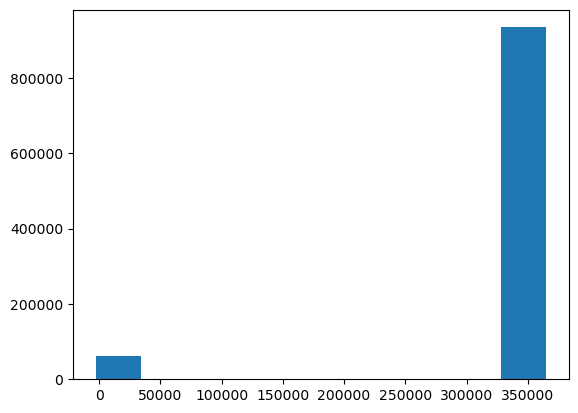

In [220]:
plt.hist(prev_df['DAYS_FIRST_DRAWING'])
plt.show()

In [221]:
prev_df['DAYS_FIRST_DRAWING'].isnull().sum()

673065

In [222]:
prev_df['DAYS_FIRST_DRAWING'].mean()

342209.85503871535

In [223]:
prev_df['DAYS_FIRST_DRAWING'].median()

365243.0

In [230]:
#Updating the value with median as that of mean is skewed
prev_df['DAYS_FIRST_DRAWING']= prev_df['DAYS_FIRST_DRAWING'].fillna(342209)

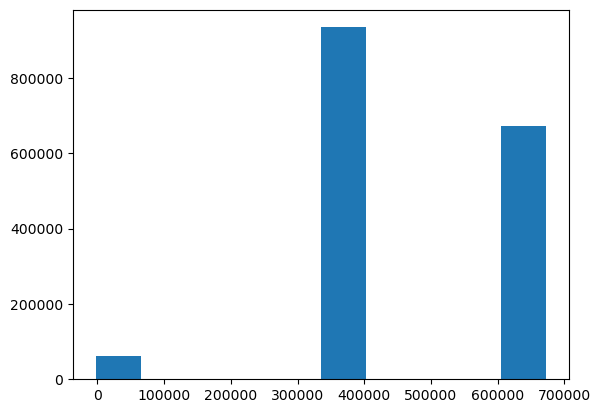

In [231]:
plt.hist(prev_df['DAYS_FIRST_DRAWING'])
plt.show()

In [232]:
prev_df['DAYS_FIRST_DUE'].describe() #Relative to application date of current application when was the first due supposed to be of the previous application

count    997149.000000
mean      13826.269337
std       72444.869708
min       -2892.000000
25%       -1628.000000
50%        -831.000000
75%        -411.000000
max      365243.000000
Name: DAYS_FIRST_DUE, dtype: float64

In [233]:
prev_df['DAYS_FIRST_DUE'].isnull().sum()

673065

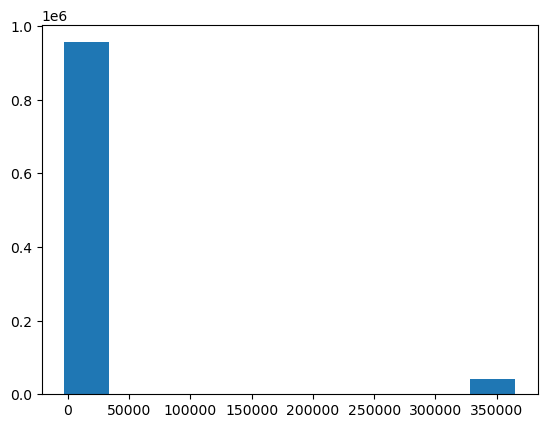

In [234]:
plt.hist(prev_df['DAYS_FIRST_DUE'])
plt.show()

In [235]:
prev_df['DAYS_FIRST_DUE'].median()

-831.0

In [239]:
prev_df['DAYS_FIRST_DUE']= prev_df['DAYS_FIRST_DUE'].fillna(-831)

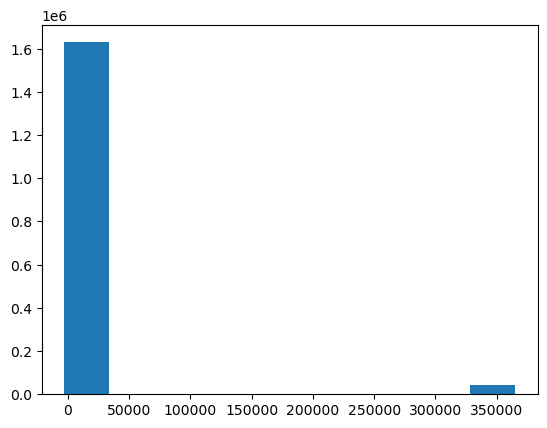

In [240]:
plt.hist(prev_df['DAYS_FIRST_DUE'])
plt.show()

In [241]:
prev_df['DAYS_FIRST_DUE'].isnull().sum()


0

In [242]:
prev_df['DAYS_LAST_DUE_1ST_VERSION'] #hen was the first due of the previous application relative to current application date

0           300.0
1           916.0
2            59.0
3          -152.0
4             NaN
            ...  
1670209     362.0
1670210   -1274.0
1670211   -1187.0
1670212    -825.0
1670213     247.0
Name: DAYS_LAST_DUE_1ST_VERSION, Length: 1670214, dtype: float64

In [243]:
prev_df['DAYS_LAST_DUE_1ST_VERSION'].isnull().sum()

673065

In [244]:
prev_df['DAYS_LAST_DUE_1ST_VERSION'].median()

-361.0

In [246]:
prev_df['DAYS_LAST_DUE_1ST_VERSION']= prev_df['DAYS_LAST_DUE_1ST_VERSION'].fillna(-361)

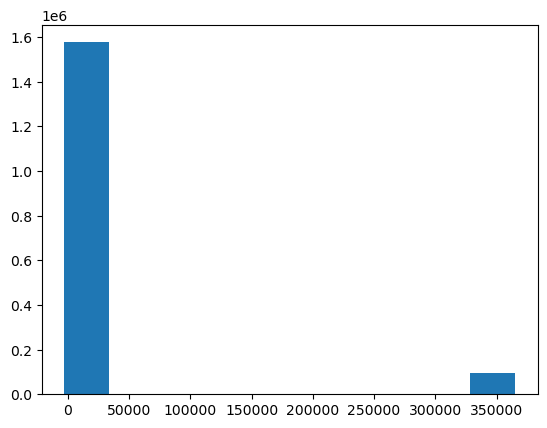

In [247]:
plt.hist(prev_df['DAYS_LAST_DUE_1ST_VERSION'])
plt.show()

In [248]:
prev_df['DAYS_LAST_DUE_1ST_VERSION'].isnull().sum()

0

In [249]:
prev_df['DAYS_LAST_DUE'].describe() #When was the last due date of the previous application relative to current application date

count    997149.000000
mean      76582.403064
std      149647.415123
min       -2889.000000
25%       -1314.000000
50%        -537.000000
75%         -74.000000
max      365243.000000
Name: DAYS_LAST_DUE, dtype: float64

In [250]:
prev_df['DAYS_LAST_DUE']

0             -42.0
1          365243.0
2          365243.0
3            -182.0
4               NaN
             ...   
1670209      -358.0
1670210     -1304.0
1670211     -1187.0
1670212      -825.0
1670213      -443.0
Name: DAYS_LAST_DUE, Length: 1670214, dtype: float64

In [251]:
prev_df['DAYS_LAST_DUE'].mean()

76582.40306413585

In [252]:
prev_df['DAYS_LAST_DUE'].median()

-537.0

In [253]:
prev_df['DAYS_LAST_DUE']= prev_df['DAYS_LAST_DUE'].fillna(-537)

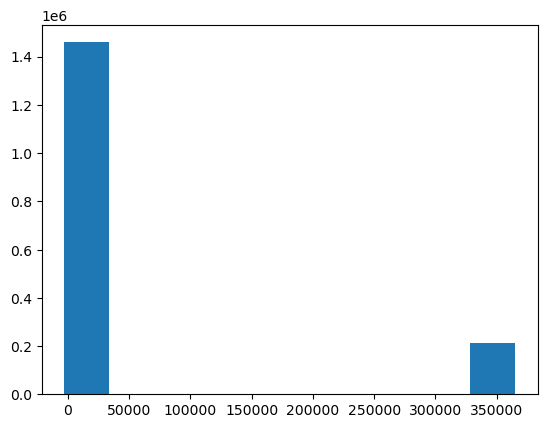

In [254]:
plt.hist(prev_df['DAYS_LAST_DUE']) # after imputation
plt.show()

In [255]:
prev_df['DAYS_LAST_DUE'].isnull().sum()

0

In [256]:
# When was the expected termination of the previous application realative to current application date
prev_df['DAYS_TERMINATION']

0             -37.0
1          365243.0
2          365243.0
3            -177.0
4               NaN
             ...   
1670209      -351.0
1670210     -1297.0
1670211     -1181.0
1670212      -817.0
1670213      -423.0
Name: DAYS_TERMINATION, Length: 1670214, dtype: float64

In [257]:
prev_df['DAYS_TERMINATION'].describe()

count    997149.000000
mean      81992.343838
std      153303.516729
min       -2874.000000
25%       -1270.000000
50%        -499.000000
75%         -44.000000
max      365243.000000
Name: DAYS_TERMINATION, dtype: float64

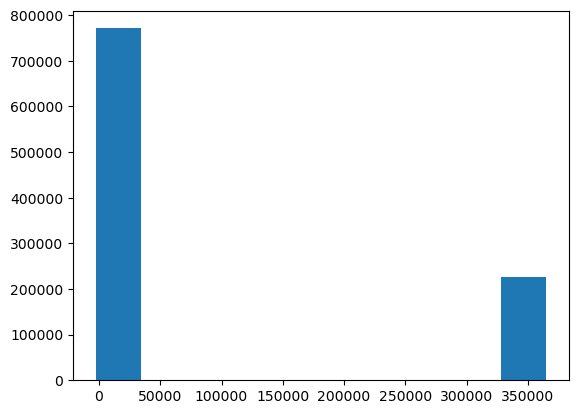

In [258]:
plt.hist(prev_df['DAYS_TERMINATION']) # Before imputation
plt.show()

In [259]:
prev_df['DAYS_TERMINATION'].mean()

81992.34383828295

In [260]:
prev_df['DAYS_TERMINATION'].median()

-499.0

In [261]:
prev_df['DAYS_TERMINATION']= prev_df['DAYS_TERMINATION'].fillna(-499)

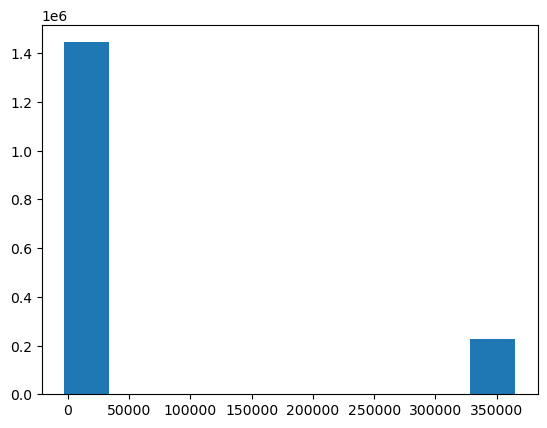

In [262]:
plt.hist(prev_df['DAYS_TERMINATION']) # After imputation
plt.show()

In [263]:
prev_df['PRODUCT_COMBINATION']

0             POS mobile with interest
1                     Cash X-Sell: low
2                    Cash X-Sell: high
3                  Cash X-Sell: middle
4                    Cash Street: high
                      ...             
1670209     POS industry with interest
1670210     POS industry with interest
1670211    POS household with interest
1670212               Cash X-Sell: low
1670213            Cash X-Sell: middle
Name: PRODUCT_COMBINATION, Length: 1670214, dtype: object

In [264]:
prev_df['PRODUCT_COMBINATION'].describe()

count     1669868
unique         17
top          Cash
freq       285990
Name: PRODUCT_COMBINATION, dtype: object

In [265]:
prev_df['PRODUCT_COMBINATION'].isnull().sum()

346

In [267]:
prev_df['PRODUCT_COMBINATION']= prev_df['PRODUCT_COMBINATION'].fillna('CASH')

In [269]:
prev_df['PRODUCT_COMBINATION'].describe()

count     1670214
unique         18
top          Cash
freq       285990
Name: PRODUCT_COMBINATION, dtype: object

In [270]:
prev_df['PRODUCT_COMBINATION'].isnull().sum()

0

In [271]:
prev_df['AMT_CREDIT'] # During application and after the credit amount how much client received

0           17145.0
1          679671.0
2          136444.5
3          470790.0
4          404055.0
             ...   
1670209    311400.0
1670210     64291.5
1670211    102523.5
1670212    191880.0
1670213    360000.0
Name: AMT_CREDIT, Length: 1670214, dtype: float64

In [272]:
prev_df['AMT_CREDIT'].describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

In [273]:
prev_df['AMT_CREDIT'].isnull().sum()

1

In [274]:
prev_df['AMT_CREDIT'].mean()

196114.02121797804

In [275]:
prev_df['AMT_CREDIT'].median()

80541.0

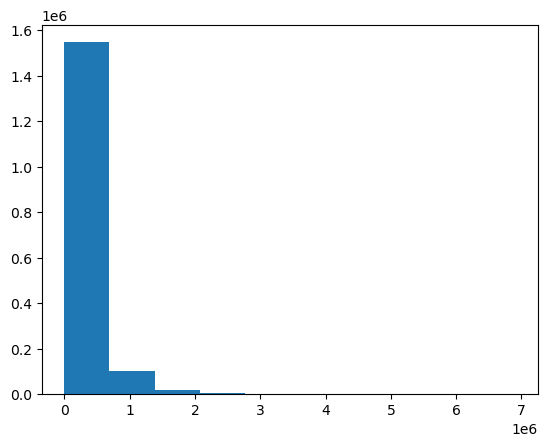

In [276]:
plt.hist(prev_df['AMT_CREDIT']) # before imputation
plt.show()

In [277]:
prev_df['AMT_CREDIT']= prev_df['AMT_CREDIT'].fillna(prev_df['AMT_CREDIT'].median())

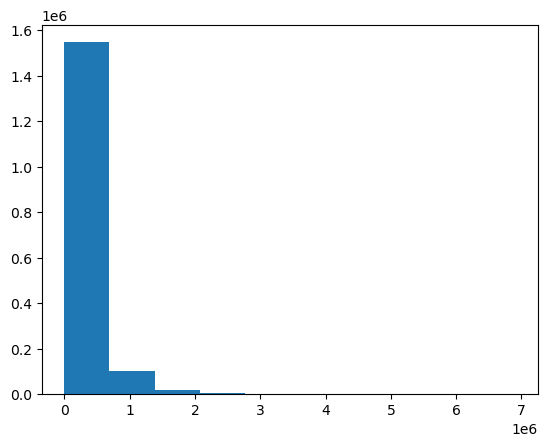

In [278]:
plt.hist(prev_df['AMT_CREDIT']) # after imputation
plt.show()

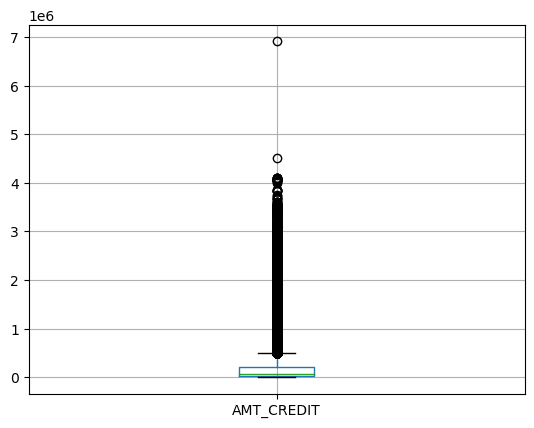

In [468]:
prev_df.boxplot('AMT_CREDIT') # discrete plot for the values
plt.show()

In [280]:
prev_df.isnull().sum() # calculating null values form over all data frame 

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                         0
AMT_APPLICATION                     0
AMT_CREDIT                          0
AMT_GOODS_PRICE                     0
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_TYPE_SUITE                     0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMB

In [281]:
prev_df['CNT_PAYMENT'].describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

In [282]:
prev_df['CNT_PAYMENT'].isnull().sum()

372230

In [283]:
prev_df['CNT_PAYMENT'].mean()

16.0540815603274

In [284]:
prev_df['CNT_PAYMENT'].median()

12.0

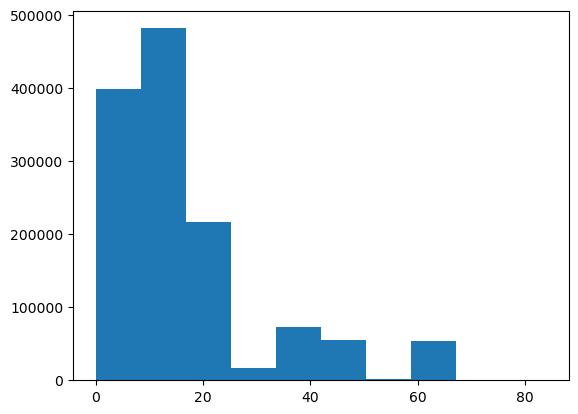

In [285]:
plt.hist(prev_df['CNT_PAYMENT']) # before imputation
plt.show()

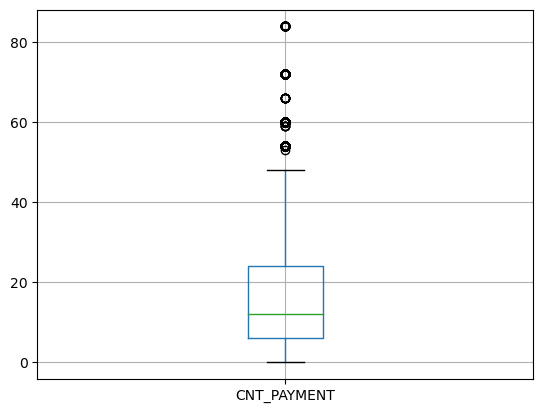

In [287]:
prev_df.boxplot('CNT_PAYMENT') # discrete plot for the values
plt.show()

In [288]:
prev_df['CNT_PAYMENT']= prev_df['CNT_PAYMENT'].fillna(prev_df['CNT_PAYMENT'].mean()) # replacing value with mean

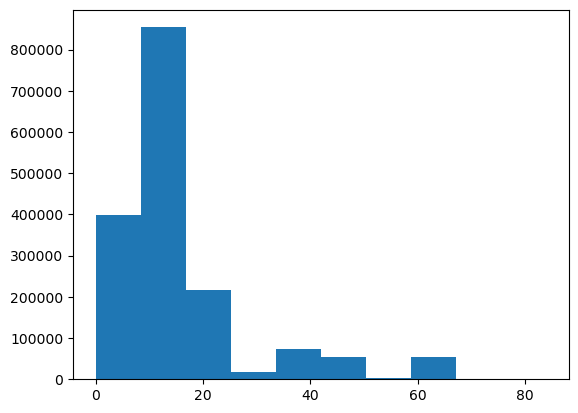

In [289]:
plt.hist(prev_df['CNT_PAYMENT']) # After imputation
plt.show()

In [291]:
prev_df['CNT_PAYMENT'].isnull().sum()

0

In [295]:
# Getting started with analysis
# seperating numerical , categorical columns

app_category=app_df.select_dtypes(include='object') # categorical valued column for application file
app_category.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion


In [297]:
app_numeric=app_df.select_dtypes(exclude='object')#numeric vaued column for application file
app_numeric.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,2.0,2.0,2.0,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,1.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,2.0,0.0,2.0,0.0,0.006438,0.006947,0.033902,0.279855,0.260213,1.857857
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [298]:
prev_category=app_df.select_dtypes(include='object') # categorical valued column for application file
prev_category.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion


In [299]:
prev_numeric=app_df.select_dtypes(exclude='object') #numeric vaued column for application file
prev_numeric.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,2.0,2.0,2.0,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,1.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,2.0,0.0,2.0,0.0,0.006438,0.006947,0.033902,0.279855,0.260213,1.857857
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [301]:
# ANalysing target values for imbalance between two different values 
# dividing the target values in two different dataframe
T0=app_df[app_df['TARGET']==0]
print("T0:",T0.shape)
T1=app_df[app_df['TARGET']==1]
print("T1:",T1.shape)

T0: (192573, 44)
T1: (18547, 44)


91.21494889259338
8.785051107406616


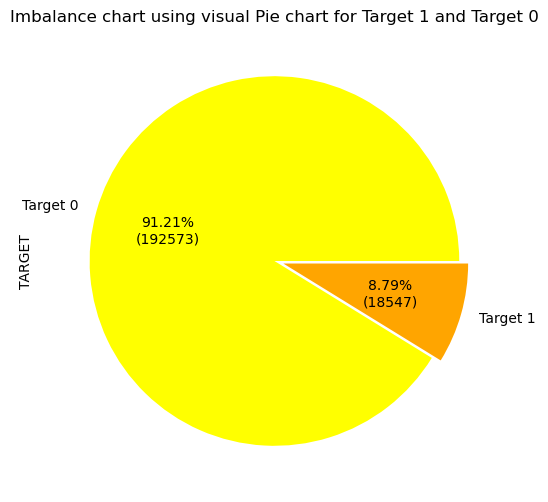

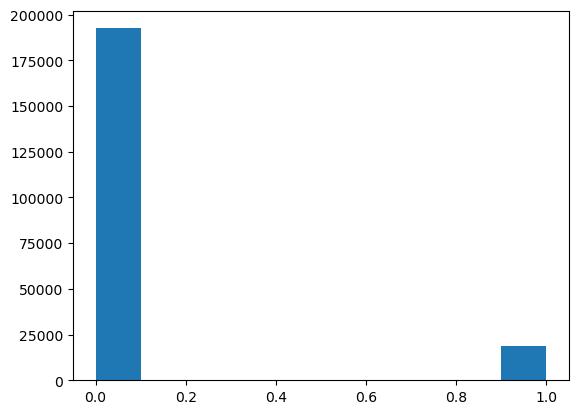

In [356]:
total=len(app_df['TARGET'])
explode = [0, 0.05]

def imbalance_comparison_plot(x):
    print(x)
    return '{:.2f}%\n({:.0f})'.format(x, len(app_df['TARGET'])*x/100)

plt.figure(figsize = [6, 6])
plt.title("Imbalance chart using visual Pie chart for Target 1 and Target 0")
plot_labels=['Target 0','Target 1']
app_df['TARGET'].value_counts().plot.pie(autopct = imbalance_comparison_plot, colors = ['yellow', 'orange'], explode = explode,labels=plot_labels)


plt.show()

plt.hist(app_df['TARGET']) # visualising using histogram plot 
plt.show()

In [357]:
# 91.21 % people with target 0 value do not face any difficulties loan amount repayment 
# 8.79 % people are facing difficulties for loan repayment

In [363]:
# Genrating ploting functing for further columns analysis
def analysis_plot(app_df, col, title, xaxis, yaxis,hue=None):
     
    
    temp = pd.Series(data = hue)
    fig, plot = plt.subplots()
    width = len(app_df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation = 45)
    plt.yscale('log')
    plt.title(title)

    plot = sn.countplot(data = app_df, x= col, order=app_df[col].value_counts().index,hue = hue, palette='dark') 
    plot.set(xlabel = xaxis, ylabel = yaxis)    
    plt.show()

(array([ 81836.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 129284.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

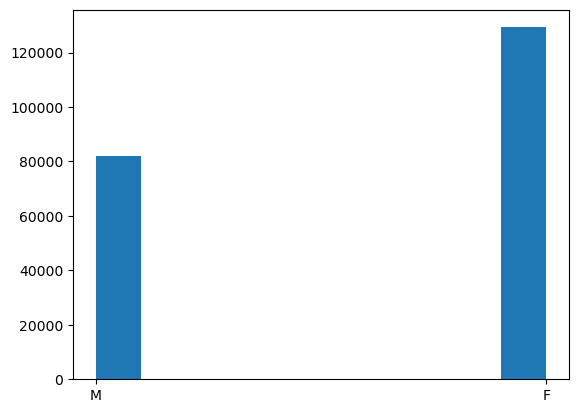

In [335]:
# checking gender graph
plt.hist(app_df['CODE_GENDER']) # the female counts is more than males 

In [345]:
# creating bins for total income due to large data available 
equal_bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
range_slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

app_df['AMT_INCOME_RANGE'] = pd.cut(app_df['AMT_INCOME_TOTAL'], bins=equal_bins, labels=range_slot)
app_df['AMT_INCOME_RANGE'].head()

0    200000-225000
1    250000-275000
2      50000-75000
3    125000-150000
4    100000-125000
Name: AMT_INCOME_RANGE, dtype: category
Categories (21, object): ['0-25000' < '25000-50000' < '50000-75000' < '75000,100000' ... '425000-450000' < '450000-475000' < '475000-500000' < '500000 and above']

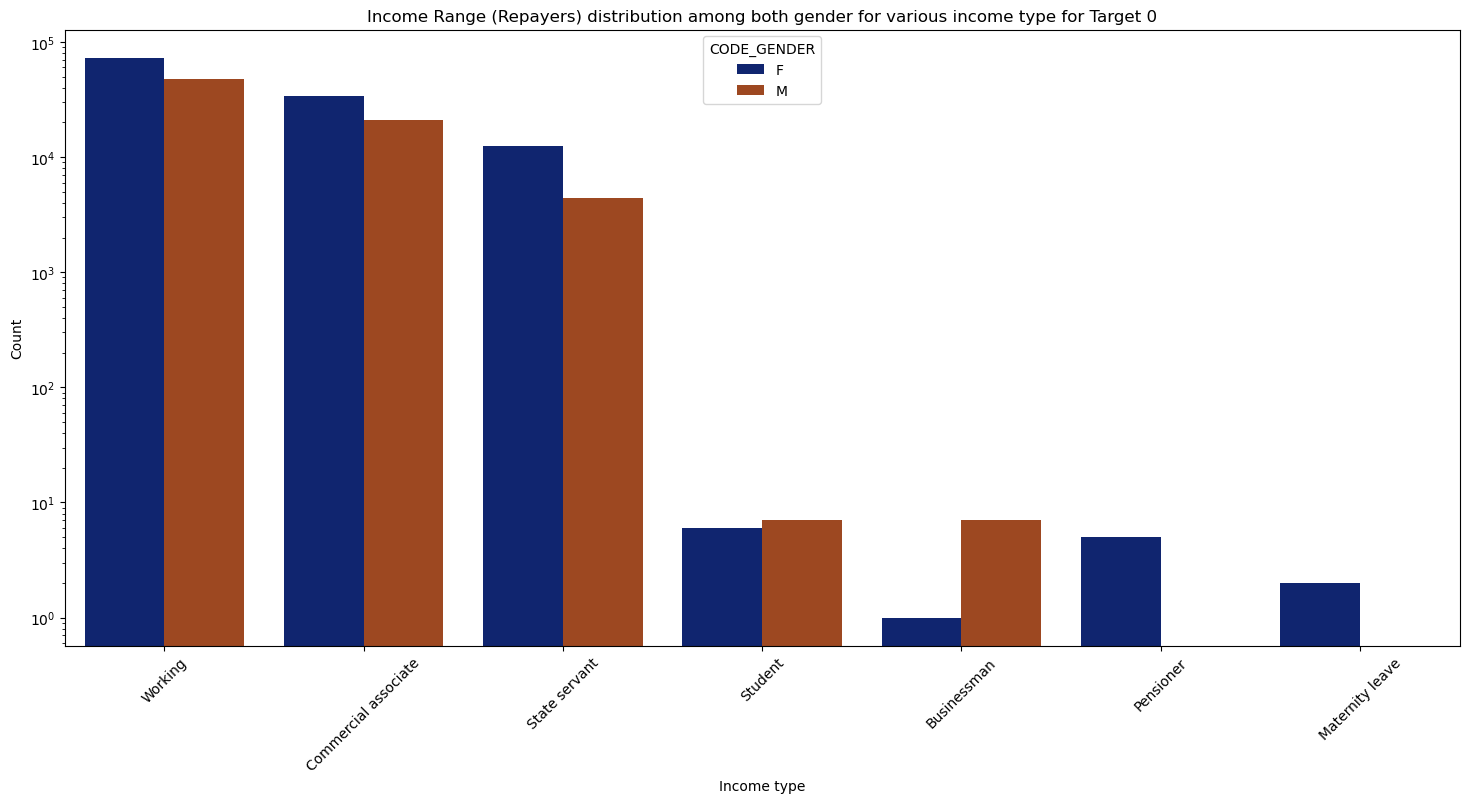

In [364]:
# plotting income grapgh aganist gender for different income type for target 0
app_df['NAME_INCOME_TYPE']
analysis_plot(T0, col='NAME_INCOME_TYPE', title='Income Range (Repayers) distribution among both gender for various income type for Target 0',hue='CODE_GENDER', xaxis = 'Income type', yaxis = 'Count')

In [351]:
# Conclusion:
# Majorly female are having high income than male in different profession
# Working, commercial associate ,state servant have merely high income than those of studnet , businessman and other 
# moreover Female ranks high in top 3 to have higher income

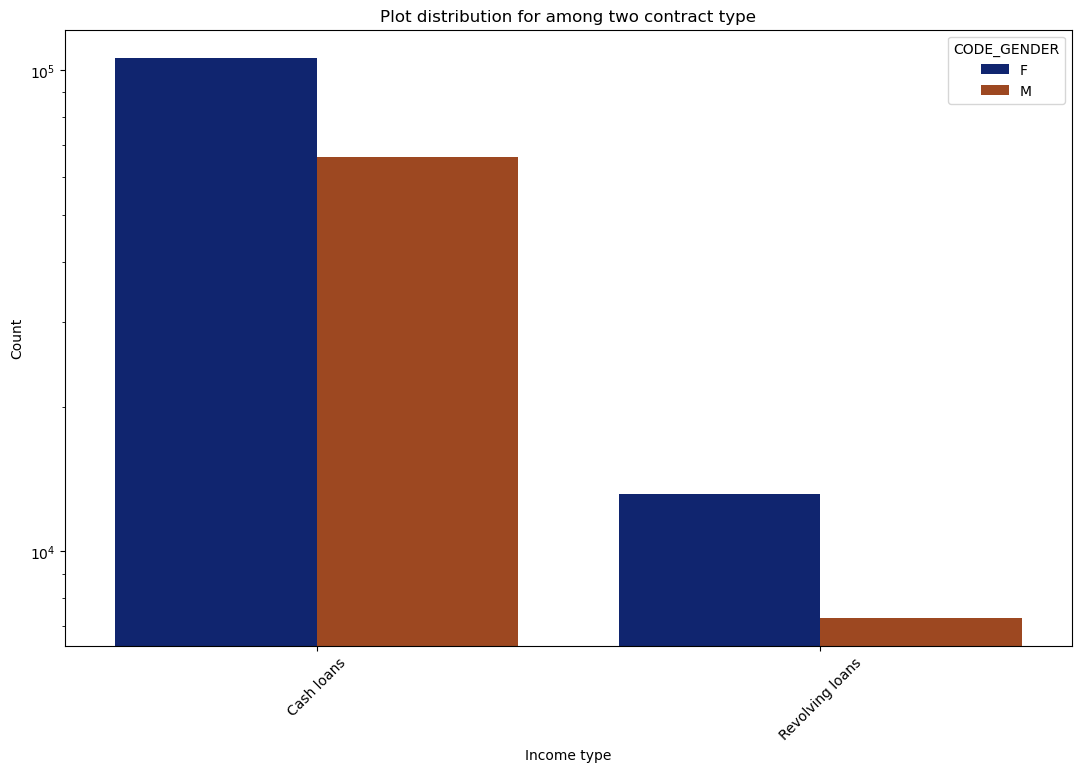

In [365]:
# Plot based on contract type mainly cash or revolving for male and female
# plotting income grapgh aganist gender for different income type
app_df['NAME_CONTRACT_TYPE']
analysis_plot(T0, col='NAME_CONTRACT_TYPE', title='Plot distribution for among two contract type',hue='CODE_GENDER', xaxis = 'Income type', yaxis = 'Count')

In [353]:
# Cash loans owned by females is more than males 
# Further more, revolving loans depicts a striped downfall in terms of loan preference by clients

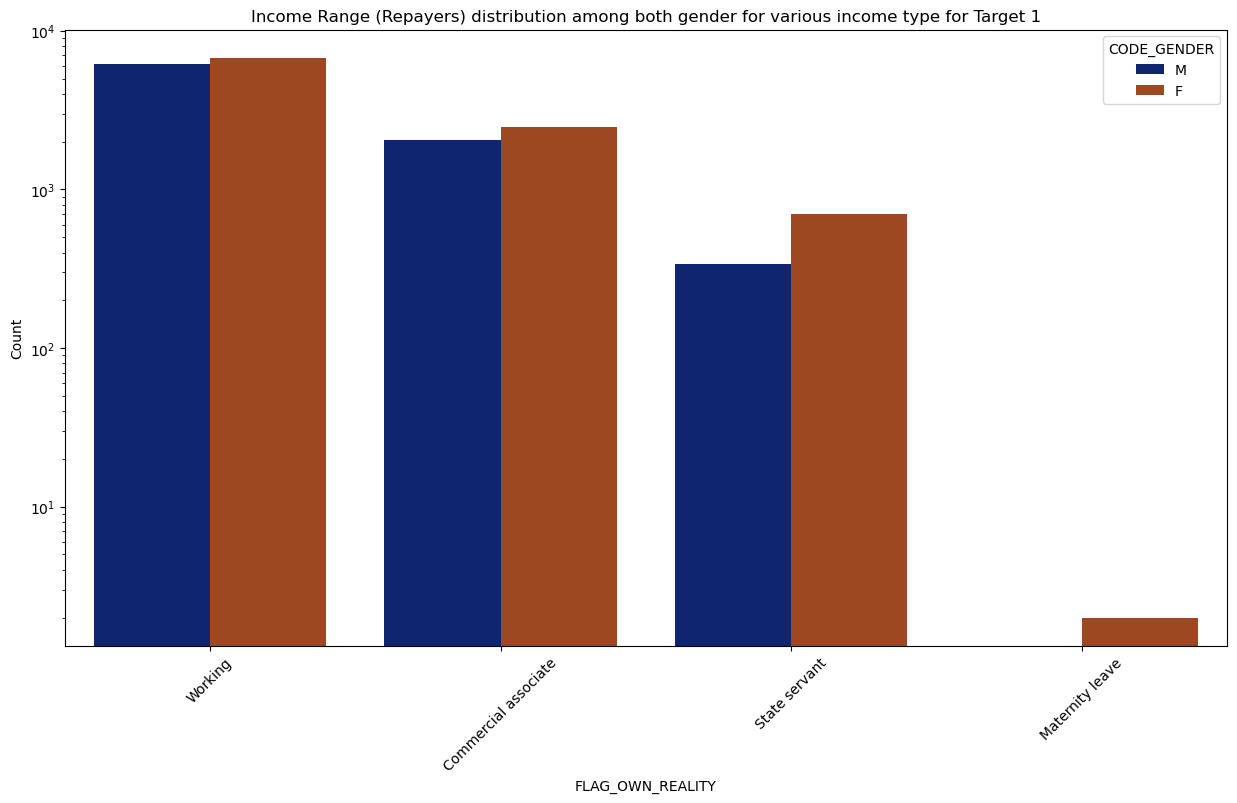

In [368]:
# plotting income grapgh aganist gender for different income type for target 1 ; where clients can repay the loan amount 
app_df['NAME_INCOME_TYPE']
analysis_plot(T1, col='NAME_INCOME_TYPE', title='Income Range (Repayers) distribution among both gender for various income type for Target 1',hue='CODE_GENDER', xaxis = 'FLAG_OWN_REALITY', yaxis = 'Count')

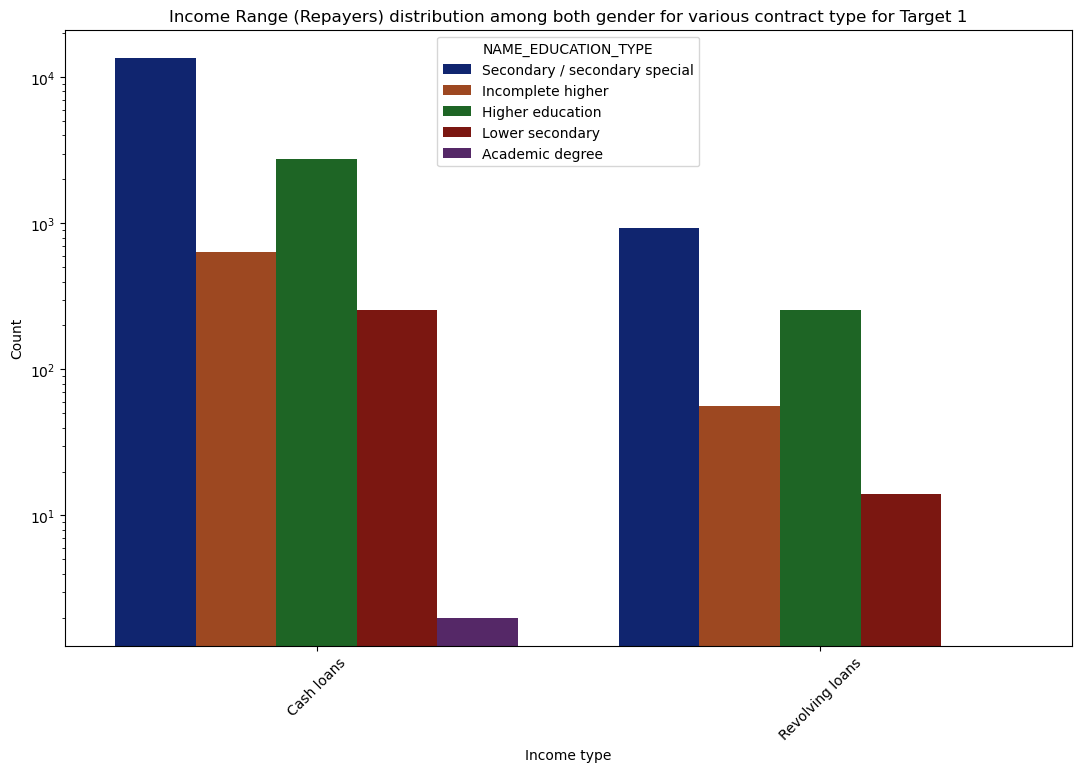

In [369]:
# Plot distribution based on contract type 
app_df['NAME_CONTRACT_TYPE']
analysis_plot(T1, col='NAME_CONTRACT_TYPE', title='Income Range (Repayers) distribution among both gender for various contract type for Target 1',hue='NAME_EDUCATION_TYPE', xaxis = 'Income type', yaxis = 'Count')

In [370]:
# COnclusion :
# Majority of client are prefering cash loans associated with higher education

In [373]:
# Merging two data set for further comparison
merge_data = pd.merge(app_df, prev_df, on = 'SK_ID_CURR', how = 'inner')
merge_data.sort_values(by = ['SK_ID_CURR','SK_ID_PREV'], ascending = [True, True], inplace = True)

In [374]:
merge_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


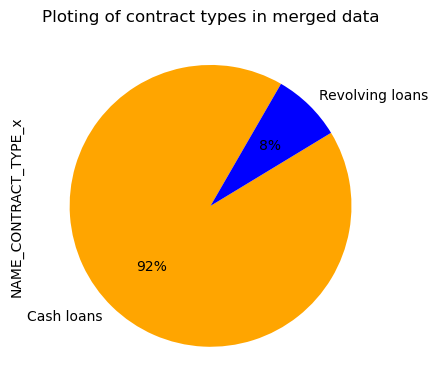

In [377]:
# ploting for contract type
plt.figure(figsize = [10, 6])
plt.subplot(1,2,1)
plt.title('Ploting of contract types in merged data')
merge_data['NAME_CONTRACT_TYPE_x'].value_counts().plot.pie(autopct = "%1.0f%%", startangle = 60, colors = ['orange', 'blue'])

plt.show()

In [378]:
# Maximum client prefer cash loans over revolving loans

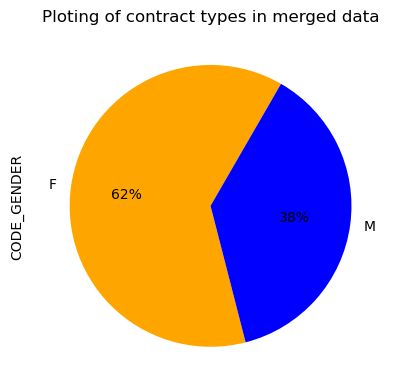

In [379]:
# ploting visual over gender
plt.figure(figsize = [10, 6])
plt.subplot(1,2,1)
plt.title('Ploting of Gender distribution in merged data')
merge_data['CODE_GENDER'].value_counts().plot.pie(autopct = "%1.0f%%", startangle = 60, colors = ['orange', 'blue'])

plt.show()

In [380]:
# For merged data too female is at 62 % and male at 38 %

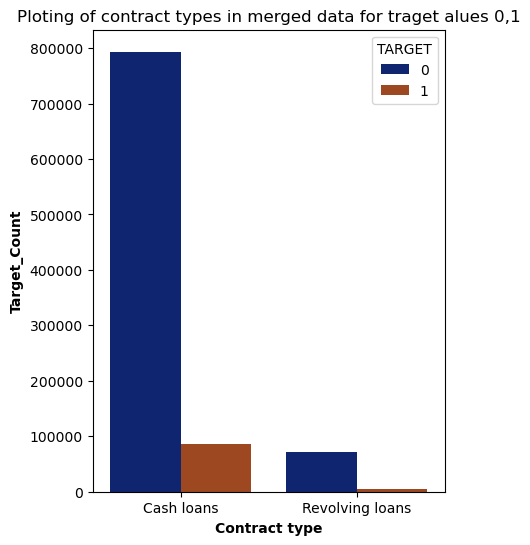

In [386]:
# ploting for contract type using target values 0,1
plt.figure(figsize = [10, 6])
plt.subplot(1,2,1)
plt.title('Ploting of contract types in merged data for traget alues 0,1')
sn.countplot('NAME_CONTRACT_TYPE_x', hue = 'TARGET', data = merge_data, palette='dark')
plt.xlabel('Contract type', weight = 'bold')
plt.ylabel('Target_Count', weight = 'bold')
plt.show()

In [387]:
# Both set of client consider cash loans over revolving loans ; Moreover by target 0 high preference is cash loans.

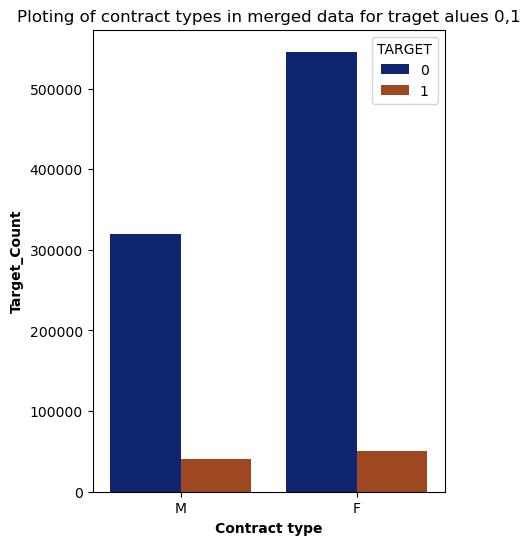

In [388]:
# ploting for contract type using gender male,female
plt.figure(figsize = [10, 6])
plt.subplot(1,2,1)
plt.title('Ploting of contract types in merged data for traget values 0,1')
sn.countplot('CODE_GENDER', hue = 'TARGET', data = merge_data, palette='dark')
plt.xlabel('Contract type', weight = 'bold')
plt.ylabel('Target_Count', weight = 'bold')
plt.show()

In [389]:
# The female client seems more responsible repayers among male among both the set

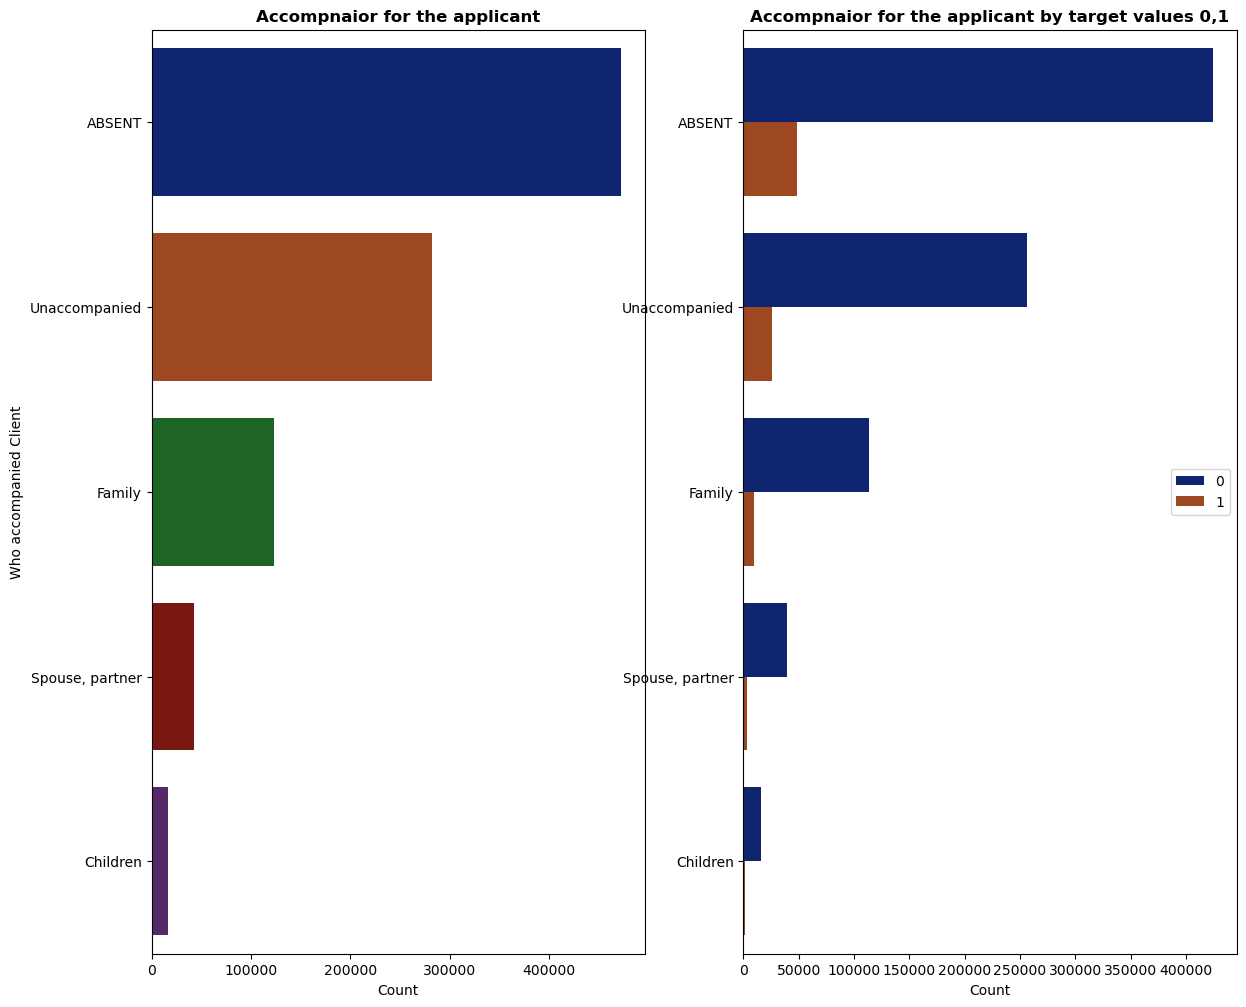

In [395]:
# Plotting the figure for accompaineor for the applicatant during the loan process
plt.figure(figsize = [14, 12])

plt.subplot(1,2,1)
plt.title('Accompnaior for the applicant', weight = 'bold')
ax = sn.countplot(y = merge_data['NAME_TYPE_SUITE_y'], palette = 'dark', order = merge_data['NAME_TYPE_SUITE_y'].value_counts().index[:5])
ax.set(xlabel = 'Count', ylabel = 'Who accompanied Client')

plt.subplot(1,2,2)
plt.title('Accompnaior for the applicant by target values 0,1', weight = 'bold')
ax = sn.countplot(y = merge_data['NAME_TYPE_SUITE_y'], palette='dark', hue=merge_data['TARGET'], order = merge_data['NAME_TYPE_SUITE_y'].value_counts().index[:5])
ax.set(xlabel = 'Count', ylabel = '')
plt.legend(loc = 'right')

plt.show()

In [396]:
# From graph could be infer that maximum client were not accompained or say lacked the guidance during loan process. However, least client were having company from children. 

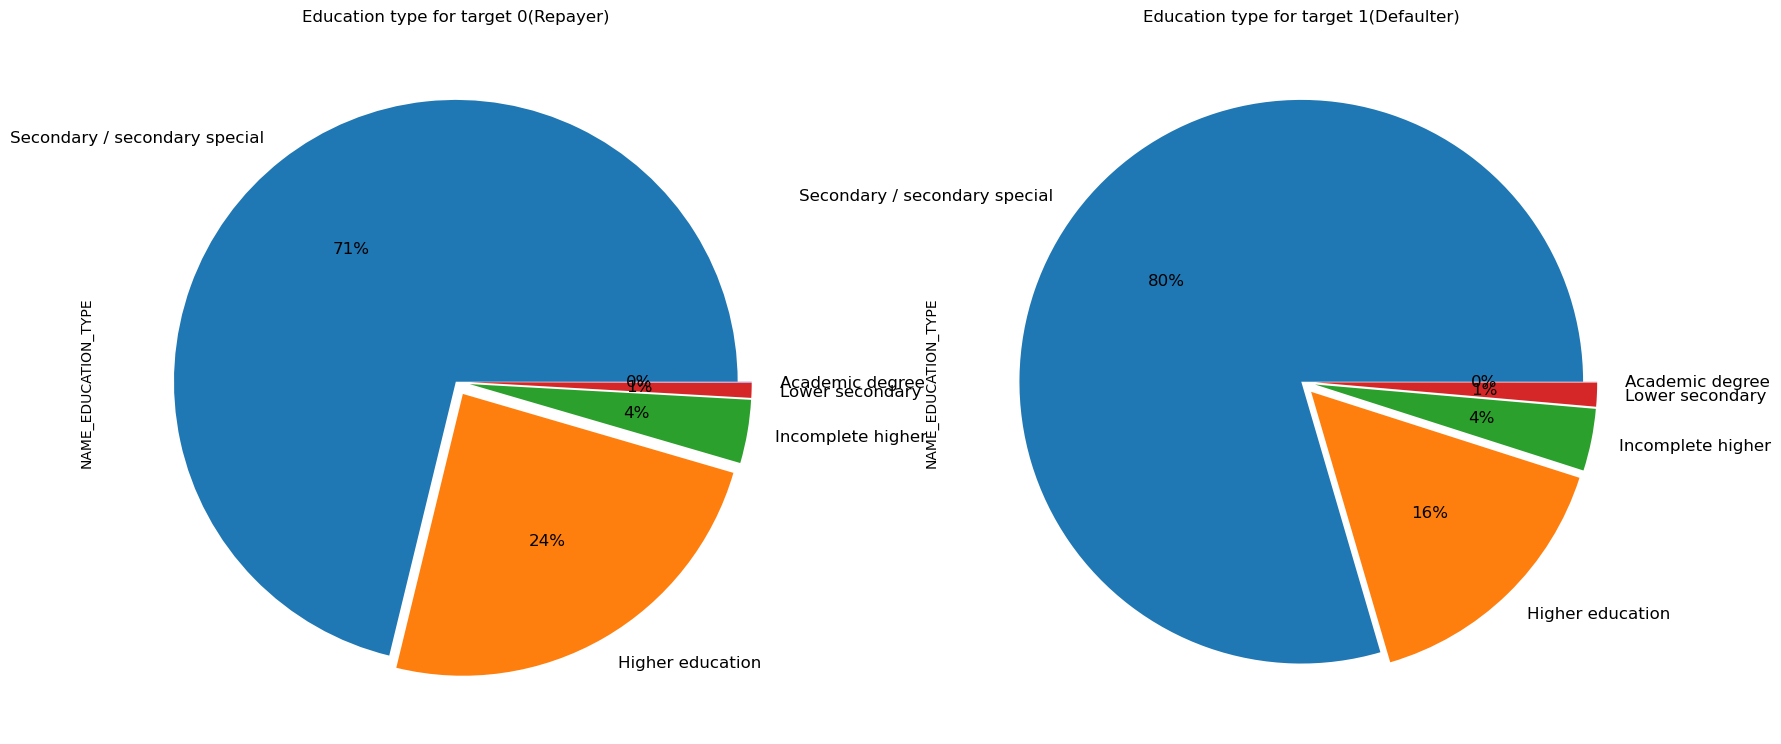

In [407]:
# Plotting the figure for clients with education types vs repayment status
plt.figure(figsize = [20, 10])
explode=[0,0.05,0.05,0.05,0.05]

plt.subplot(1,2,1)
plt.title('Education type for target 0(Repayer)')
merge_data[merge_data['TARGET']==0]['NAME_EDUCATION_TYPE'].value_counts().plot.pie(fontsize=12,autopct='%1.0f%%',explode=explode)

plt.subplot(1,2,2)
plt.title('Education type for target 1(Defaulter)')
merge_data[merge_data['TARGET']==1]['NAME_EDUCATION_TYPE'].value_counts().plot.pie(fontsize=12,autopct='%1.0f%%',explode=explode)

plt.show()

In [408]:
# The defaulters are 9 times higher than those with repayer having secondary education 
# On other side the count for defaulter is reduced by 8 % in higher education , where as other category has minority level for repaymnet status

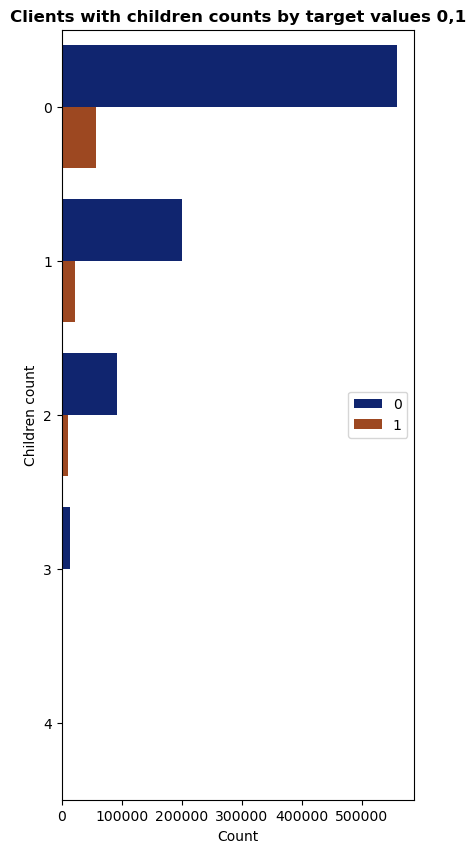

In [418]:
# Plotting the figure for clients with Children counts vs repayment status
plt.figure(figsize = [10, 10])

plt.subplot(1,2,2)
plt.title('Clients with children counts by target values 0,1', weight = 'bold')
ax = sn.countplot(y = merge_data['CNT_CHILDREN'], palette='dark', hue=merge_data['TARGET'], order = merge_data['CNT_CHILDREN'].value_counts().index[:5])
ax.set(xlabel = 'Count', ylabel = 'Children count')
plt.legend(loc = 'right')

plt.show()

In [414]:
# The client with no children are likely to repay than that of hvaing more than 1 child.

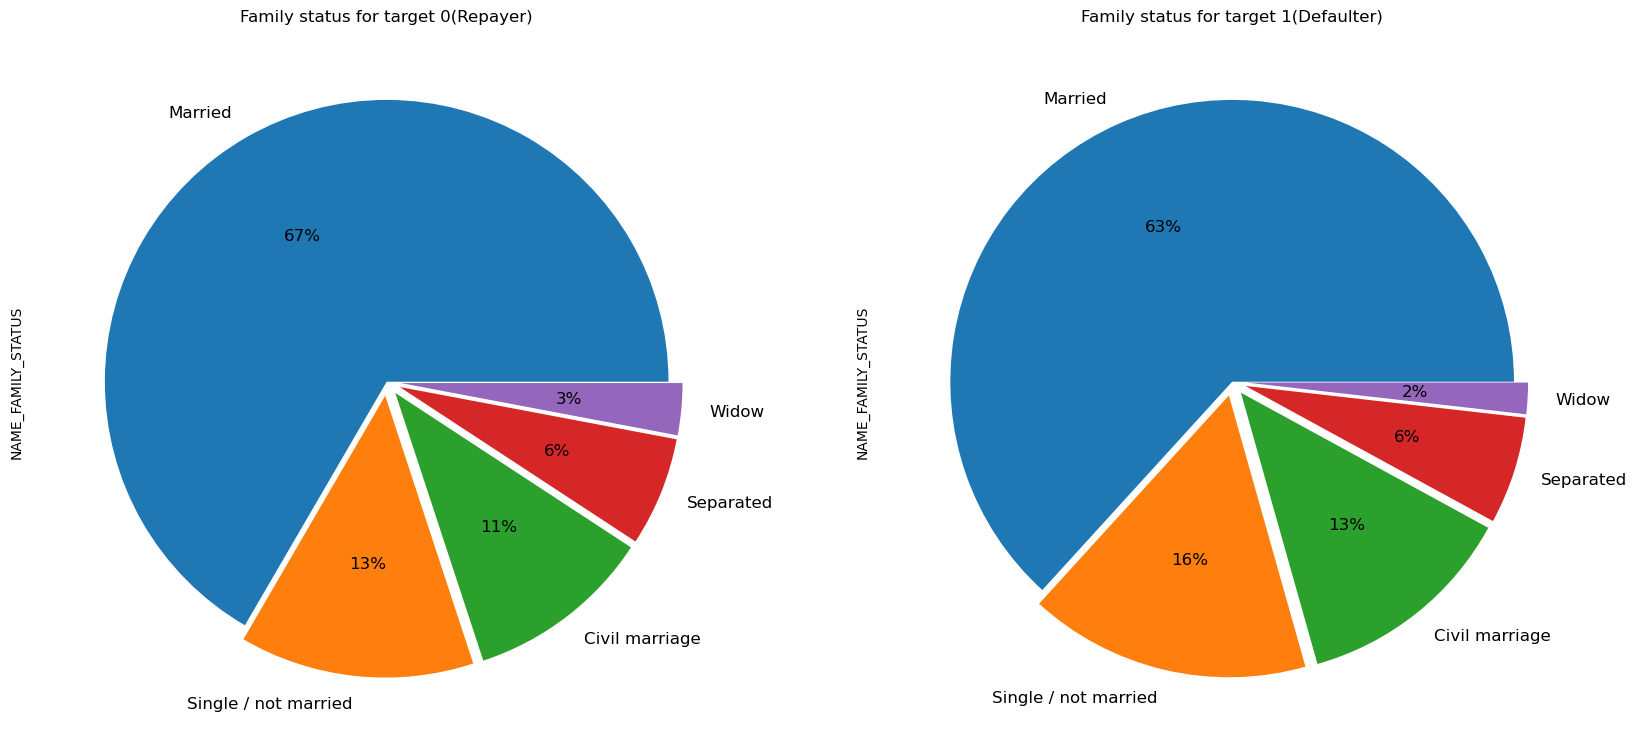

In [419]:
# Plotting graph using Family status for client vs repayment status
plt.figure(figsize = [20, 10])
explode=[0,0.05,0.05,0.05,0.05]

plt.subplot(1,2,1)
plt.title('Family status for target 0(Repayer)')
merge_data[merge_data['TARGET']==0]['NAME_FAMILY_STATUS'].value_counts().plot.pie(fontsize=12,autopct='%1.0f%%',explode=explode)

plt.subplot(1,2,2)
plt.title('Family status for target 1(Defaulter)')
merge_data[merge_data['TARGET']==1]['NAME_FAMILY_STATUS'].value_counts().plot.pie(fontsize=12,autopct='%1.0f%%',explode=explode)

plt.show()

In [420]:
# Negligible different amoung both the client for facing difficulty in repayment for married one
# Where as an even distribution for family status in both cases for repayment

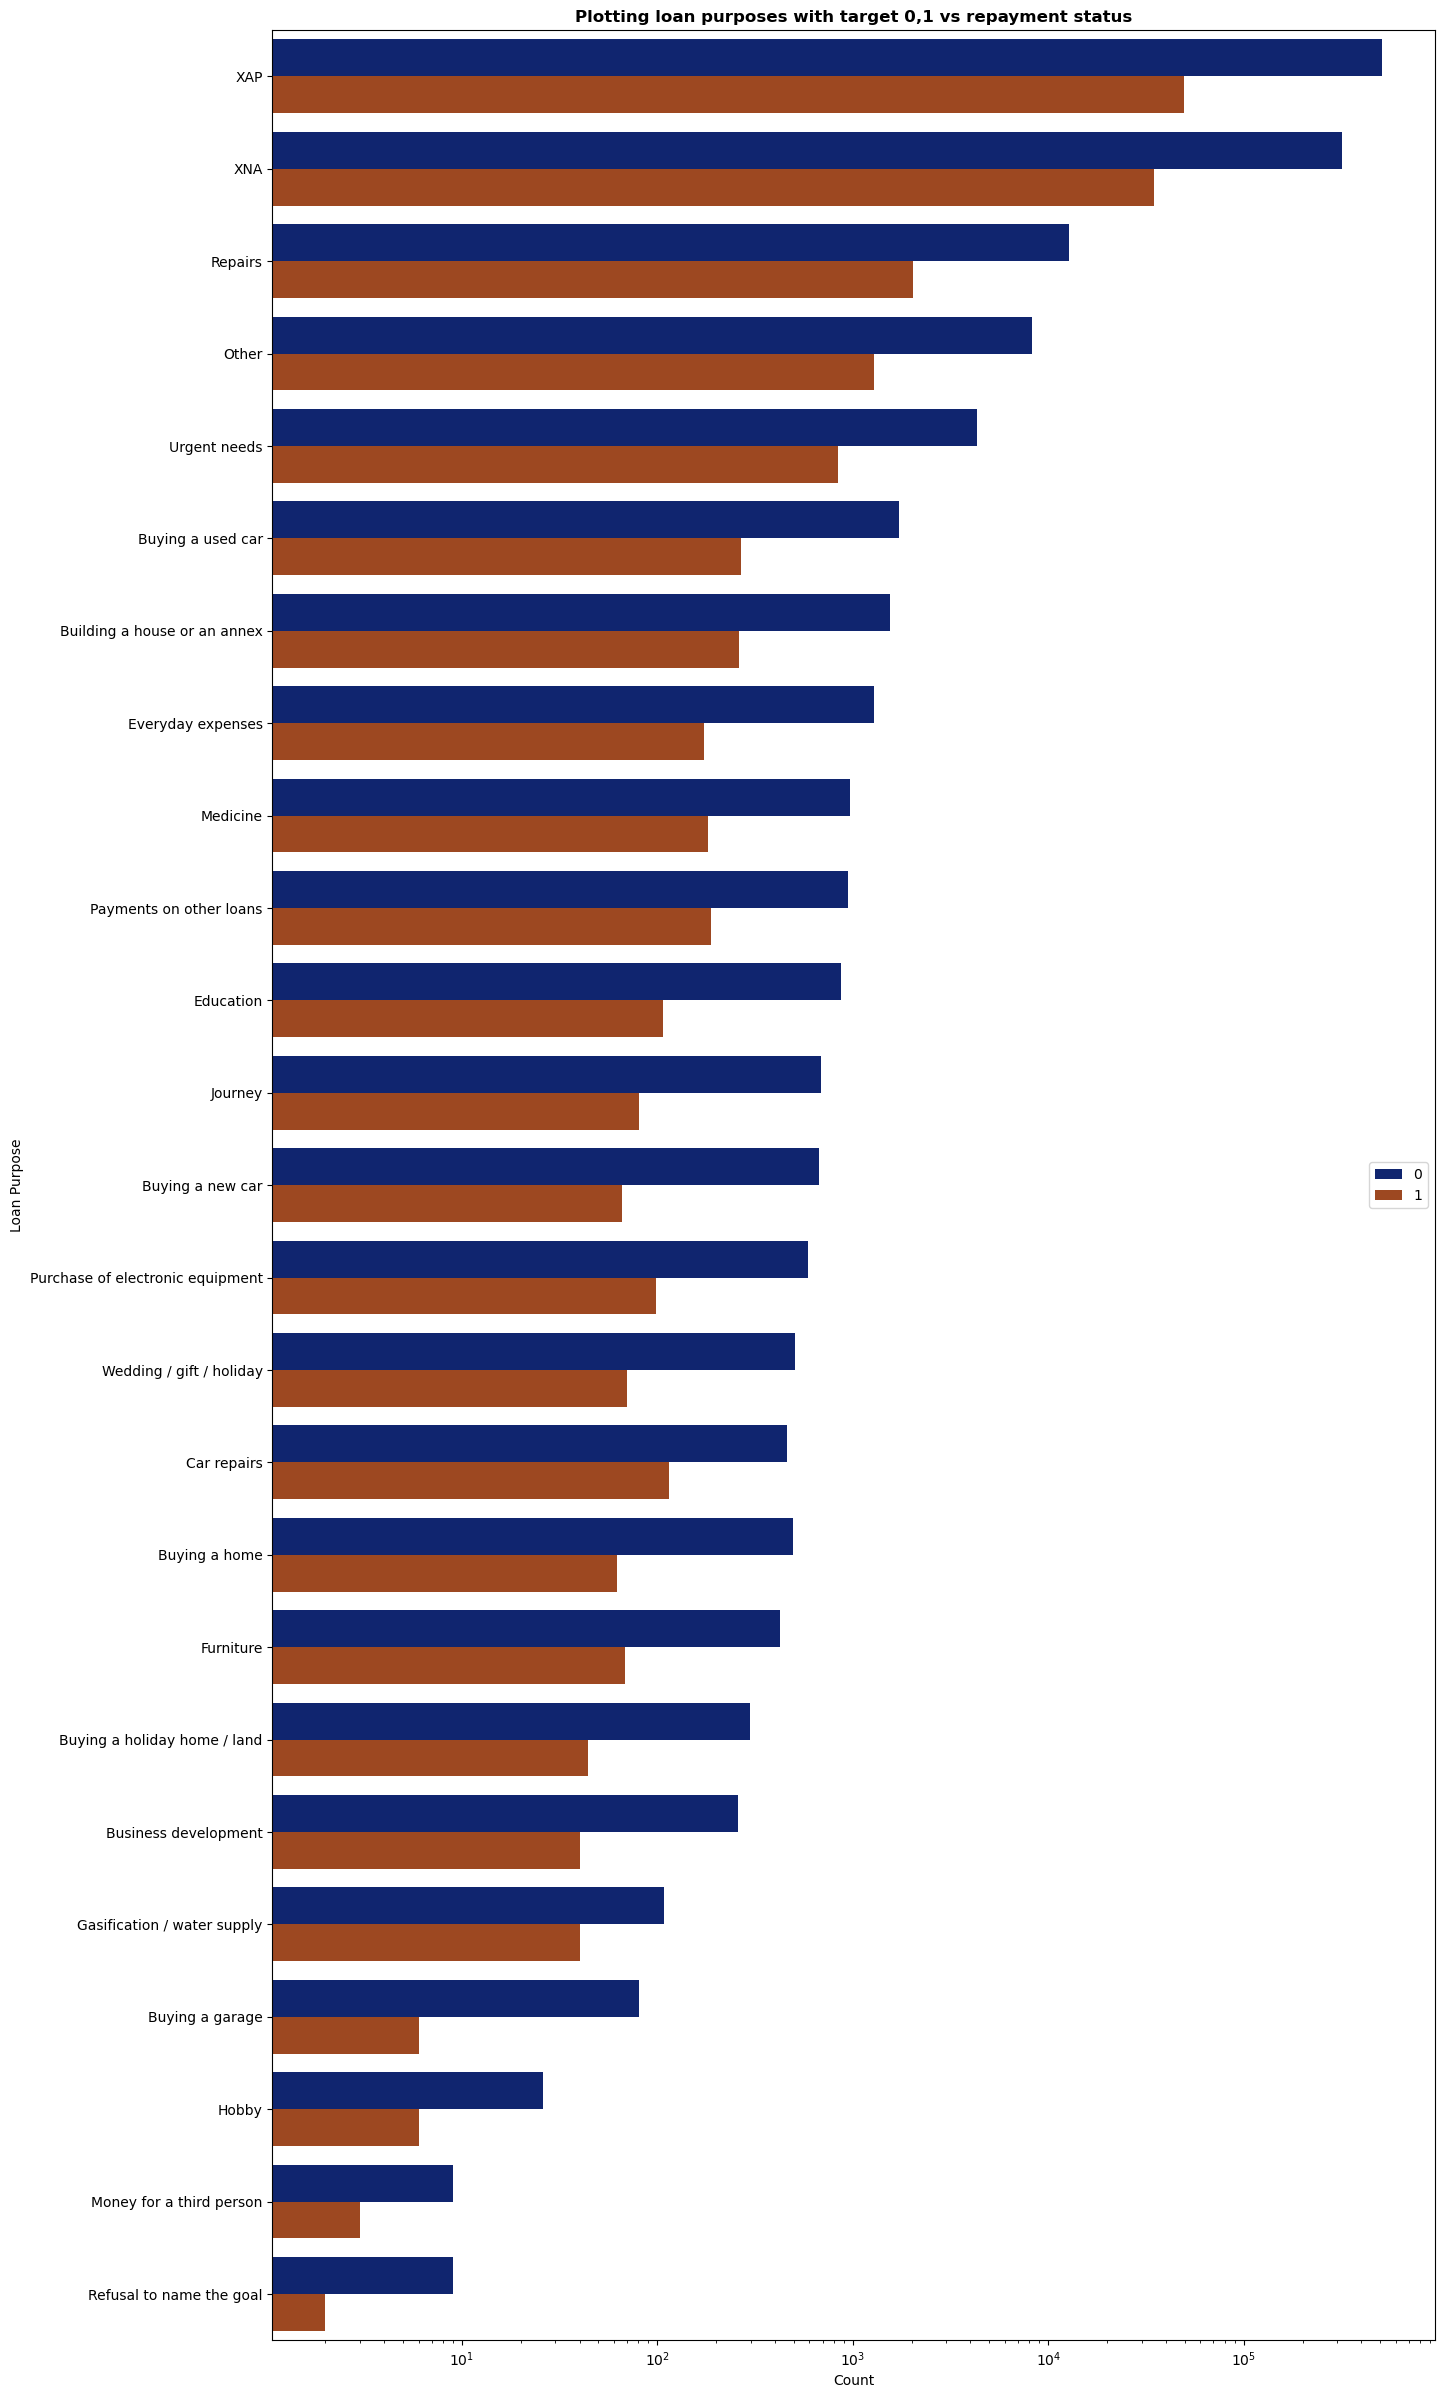

In [424]:
# Plotting figure to visualise the loan purpose by repayment status by target
plt.figure(figsize = [15, 30])
plt.xscale('log')
plt.title('Plotting loan purposes with target 0,1 vs repayment status',  weight = "bold")

ax = sn.countplot(data = merge_data, y = 'NAME_CASH_LOAN_PURPOSE', order = merge_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index, hue = 'TARGET', palette = 'dark') 
plt.ylabel('Loan Purpose')
plt.xlabel('Count')

plt.legend(loc = 'right')
plt.show()

In [425]:
# Excluding the XAP , XNA (Not exact defined purposes), repair purposes is at top list with maximum defaulter nad repayer

In [426]:
# Correlative variable
Repay = merge_data[merge_data['TARGET'] == 0]
Defaulter = merge_data[merge_data['TARGET'] == 1]

In [452]:
Repay.corr().unstack().sort_values(ascending = False,kind='quicksort').drop_duplicates().abs() # generating corelative variables

SK_ID_CURR                   SK_ID_CURR                    1.000000
AMT_GOODS_PRICE_x            AMT_CREDIT_x                  0.985660
AMT_CREDIT_y                 AMT_APPLICATION               0.973159
DAYS_TERMINATION             DAYS_LAST_DUE                 0.930055
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.876816
                                                             ...   
AMT_APPLICATION              AMT_GOODS_PRICE_y             0.309099
DAYS_FIRST_DRAWING           DAYS_LAST_DUE                 0.374619
DAYS_TERMINATION             DAYS_FIRST_DRAWING            0.443144
DAYS_FIRST_DRAWING           DAYS_LAST_DUE_1ST_VERSION     0.498665
SK_ID_CURR                   TARGET                             NaN
Length: 1036, dtype: float64

In [453]:
Repay.corr().unstack().sort_values(ascending = False,kind='quicksort').drop_duplicates().abs().head(10)


SK_ID_CURR                   SK_ID_CURR                    1.000000
AMT_GOODS_PRICE_x            AMT_CREDIT_x                  0.985660
AMT_CREDIT_y                 AMT_APPLICATION               0.973159
DAYS_TERMINATION             DAYS_LAST_DUE                 0.930055
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.876816
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE      0.865745
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY       0.825342
AMT_ANNUITY_x                AMT_GOODS_PRICE_x             0.750534
AMT_CREDIT_x                 AMT_ANNUITY_x                 0.747118
AMT_APPLICATION              CNT_PAYMENT                   0.648360
dtype: float64

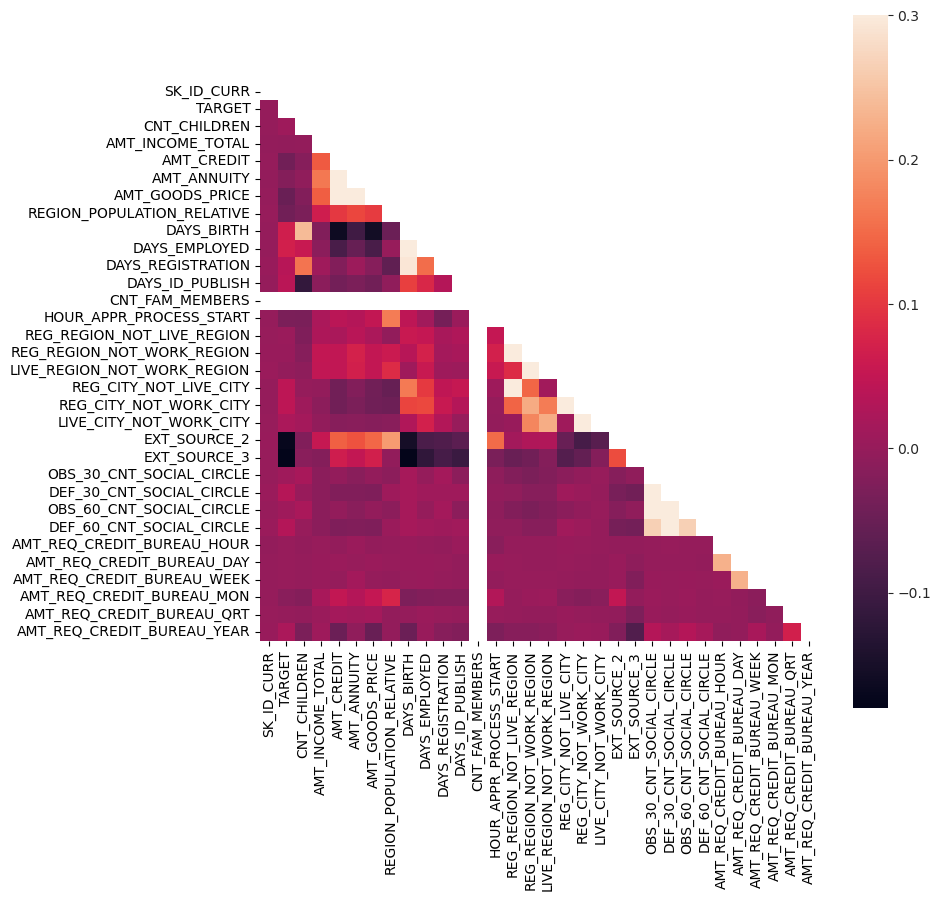

In [449]:
# Generating correlation among columns of data using heatmap
correlation = app_df.corr()
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(9, 9))
with sn.axes_style("white"):
    ax = sn.heatmap(correlation, mask=mask, vmax=.3, square=True)

In [454]:
Defaulter.corr().unstack().sort_values(ascending = False,kind='quicksort').drop_duplicates().abs().head(10)

SK_ID_CURR                  SK_ID_CURR                     1.000000
AMT_GOODS_PRICE_x           AMT_CREDIT_x                   0.981656
AMT_CREDIT_y                AMT_APPLICATION                0.973343
DAYS_LAST_DUE               DAYS_TERMINATION               0.945315
REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION    0.866704
DEF_30_CNT_SOCIAL_CIRCLE    DEF_60_CNT_SOCIAL_CIRCLE       0.856626
LIVE_CITY_NOT_WORK_CITY     REG_CITY_NOT_WORK_CITY         0.776536
AMT_GOODS_PRICE_x           AMT_ANNUITY_x                  0.737564
AMT_CREDIT_x                AMT_ANNUITY_x                  0.737129
CNT_PAYMENT                 AMT_APPLICATION                0.664802
dtype: float64

In [456]:
# Generating a dataframe with columns of high correlation for repayer
Top10_correlation_values = Repay[['OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 
                                  'AMT_APPLICATION', 'DAYS_TERMINATION', 'DAYS_LAST_DUE', 'CNT_FAM_MEMBERS',
                                  'CNT_CHILDREN', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
                                  'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_GOODS_PRICE_y', 'REG_CITY_NOT_WORK_CITY'
                                  , 'LIVE_CITY_NOT_WORK_CITY', 'AMT_CREDIT_y', 'AMT_ANNUITY_y']].copy()

Top10_correlation_values.shape

(865635, 16)

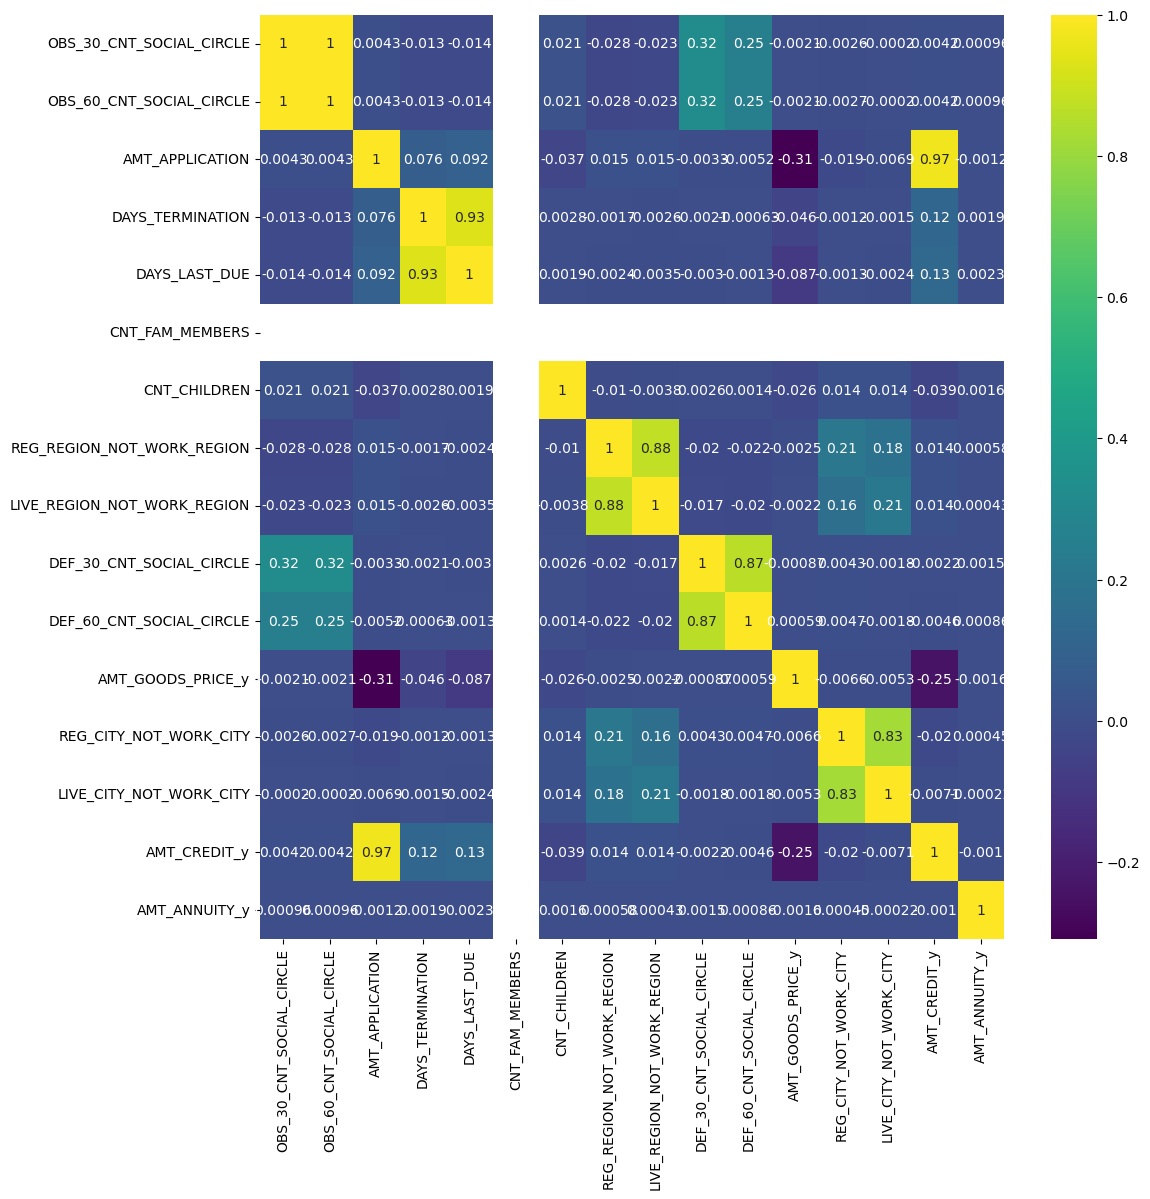

In [463]:
# Heatmap for top 10 correlation repayers
plt.figure(figsize = [12, 12])
sn.heatmap(data = Top10_correlation_values.corr(), cmap='viridis', annot=True)

plt.show()

In [465]:
# Generating a dataframe with columns of high correlation for defaulter
Top10_correlation_values_1 = Repay[['OBS_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'AMT_APPLICATION', 'AMT_CREDIT_y', 'DAYS_TERMINATION', 'DAYS_LAST_DUE',
'CNT_FAM_MEMBERS', 'CNT_CHILDREN', 'LIVE_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_WORK_REGION',
'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_ANNUITY_y','LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY', 'AMT_GOODS_PRICE_y', 'AMT_ANNUITY_x',
'AMT_CREDIT_x']].copy()

Top10_correlation_values_1.shape

(865635, 18)

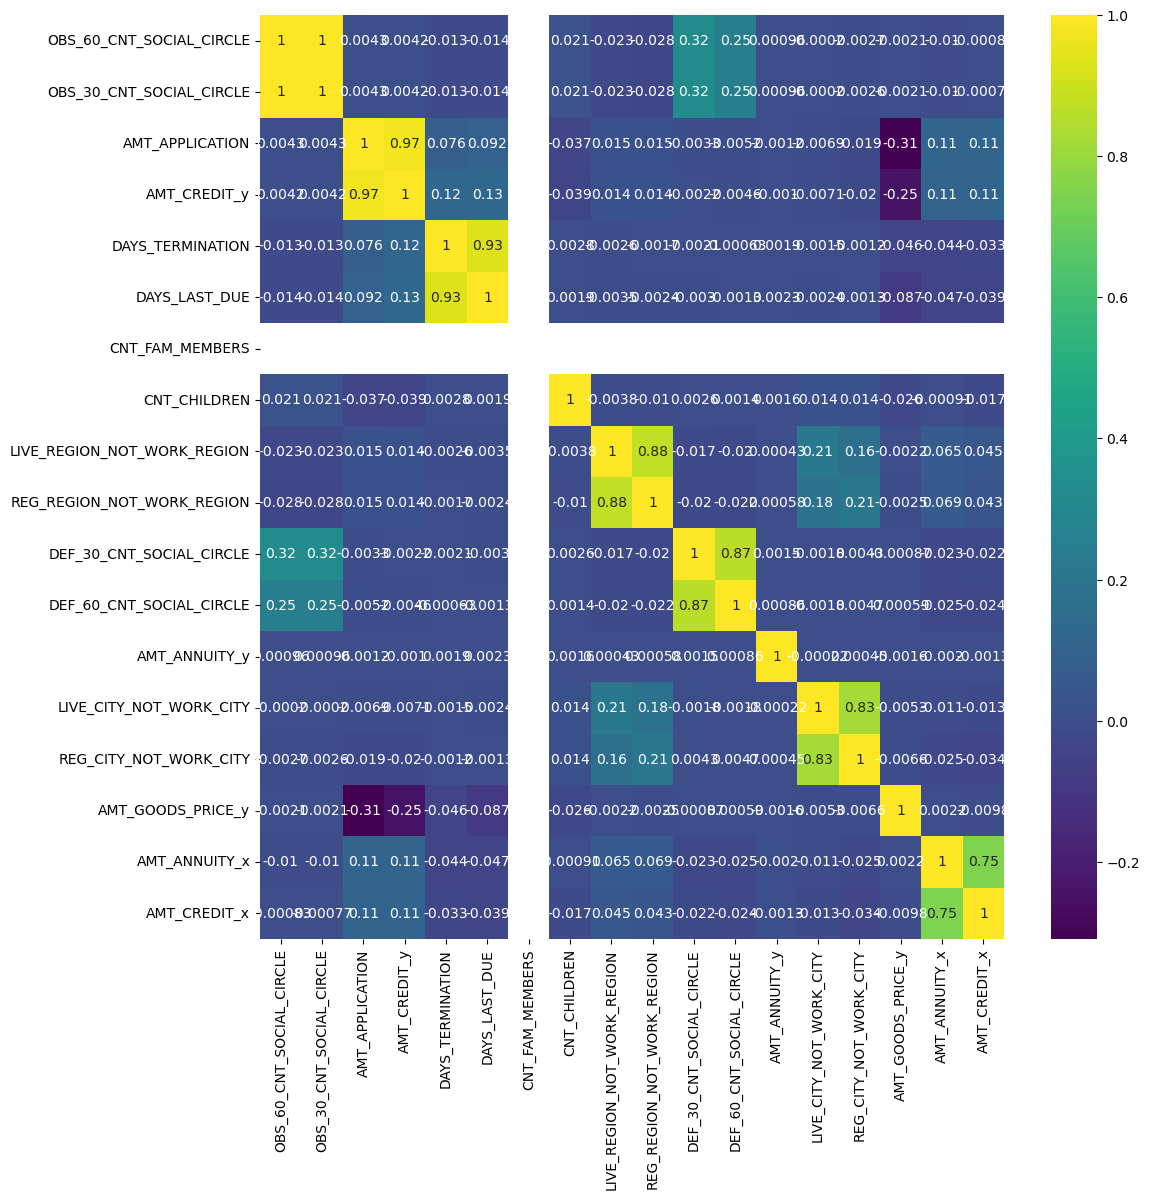

In [467]:
# Heatmap plot for defaulters
plt.figure(figsize = [12, 12])
sn.heatmap(data = Top10_correlation_values_1.corr(), cmap='viridis', annot=True)

plt.show()

In [473]:
# Checking outlier in prev & app data for application
prev_df['AMT_APPLICATION']

0           17145.0
1          607500.0
2          112500.0
3          450000.0
4          337500.0
             ...   
1670209    267295.5
1670210     87750.0
1670211    105237.0
1670212    180000.0
1670213    360000.0
Name: AMT_APPLICATION, Length: 1670214, dtype: float64

In [474]:
prev_df['AMT_APPLICATION'].describe()

count    1.670214e+06
mean     1.752339e+05
std      2.927798e+05
min      0.000000e+00
25%      1.872000e+04
50%      7.104600e+04
75%      1.803600e+05
max      6.905160e+06
Name: AMT_APPLICATION, dtype: float64

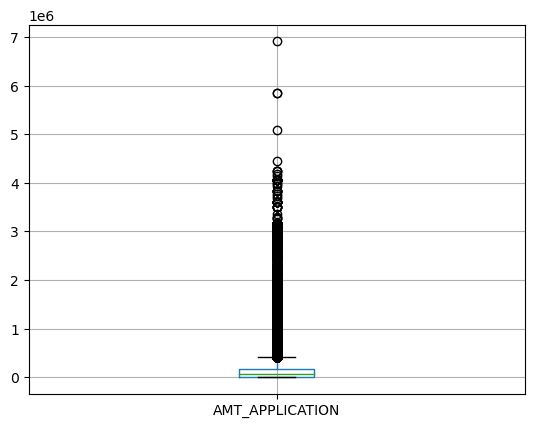

In [476]:
prev_df.boxplot('AMT_APPLICATION') # continuous plot
plt.show()

In [477]:
app_df['CNT_CHILDREN']

0         0
1         0
2         0
3         0
4         0
         ..
307504    0
307506    0
307508    0
307509    0
307510    0
Name: CNT_CHILDREN, Length: 211120, dtype: int64

In [478]:
app_df['CNT_CHILDREN'].isnull().sum()

0

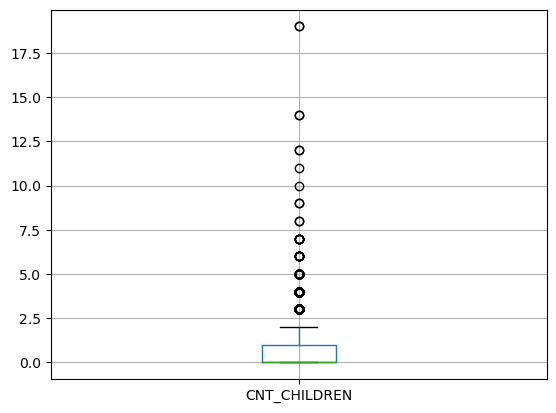

In [479]:
app_df.boxplot('CNT_CHILDREN') # discrete values with outlier
plt.show()

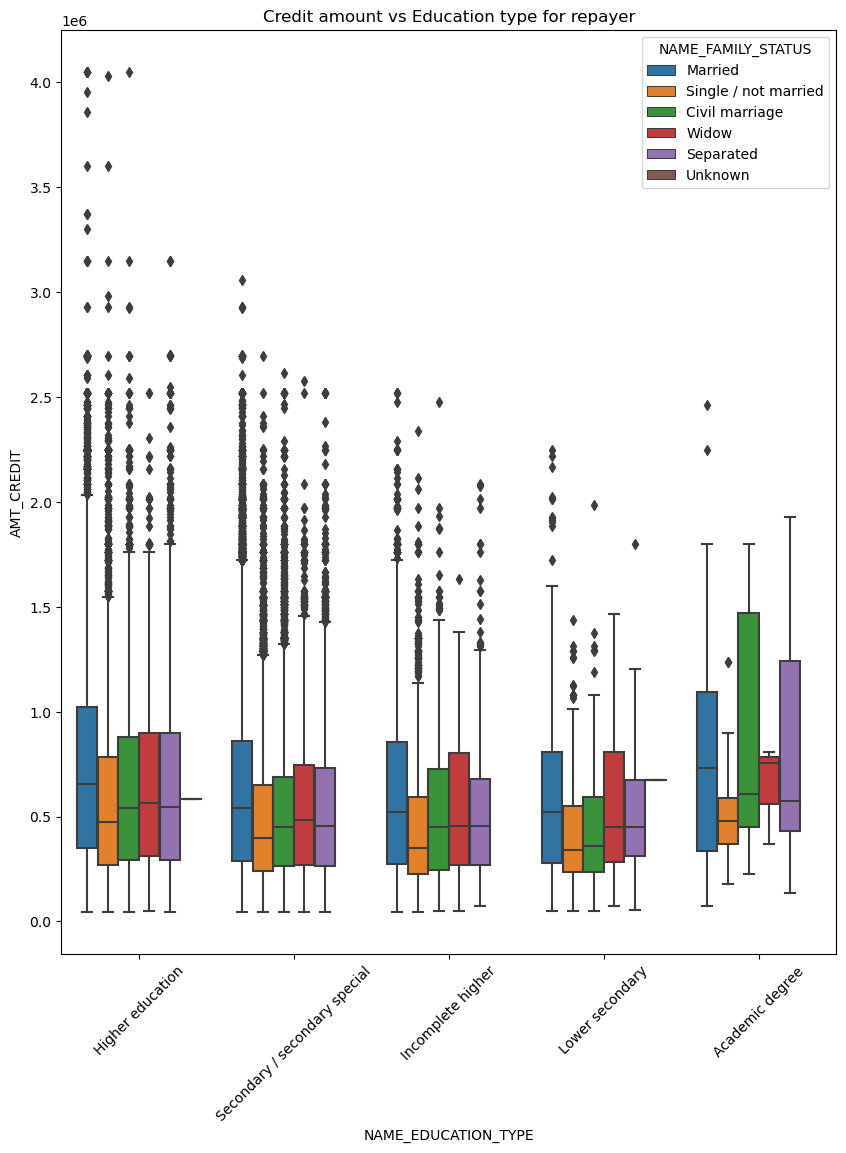

In [488]:
# doing Bivariate analysis 

# Education vs Credit amount for target 0

plt.figure(figsize=(10,12))
plt.xticks(rotation=45)
sn.boxplot(data =T0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education type for repayer')
plt.show()

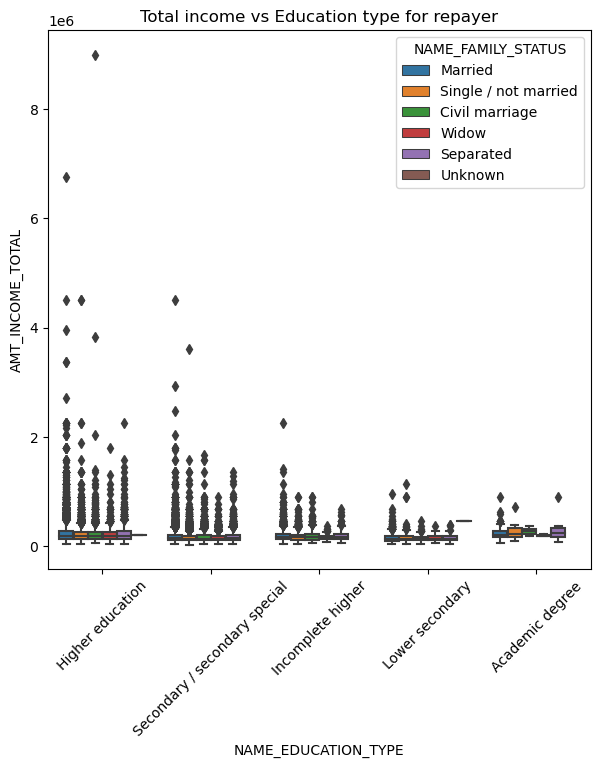

In [489]:
# Education vs Income total for target 0

plt.figure(figsize=(7,7))
plt.xticks(rotation=45)
sn.boxplot(data =T0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Total income vs Education type for repayer')
plt.show()

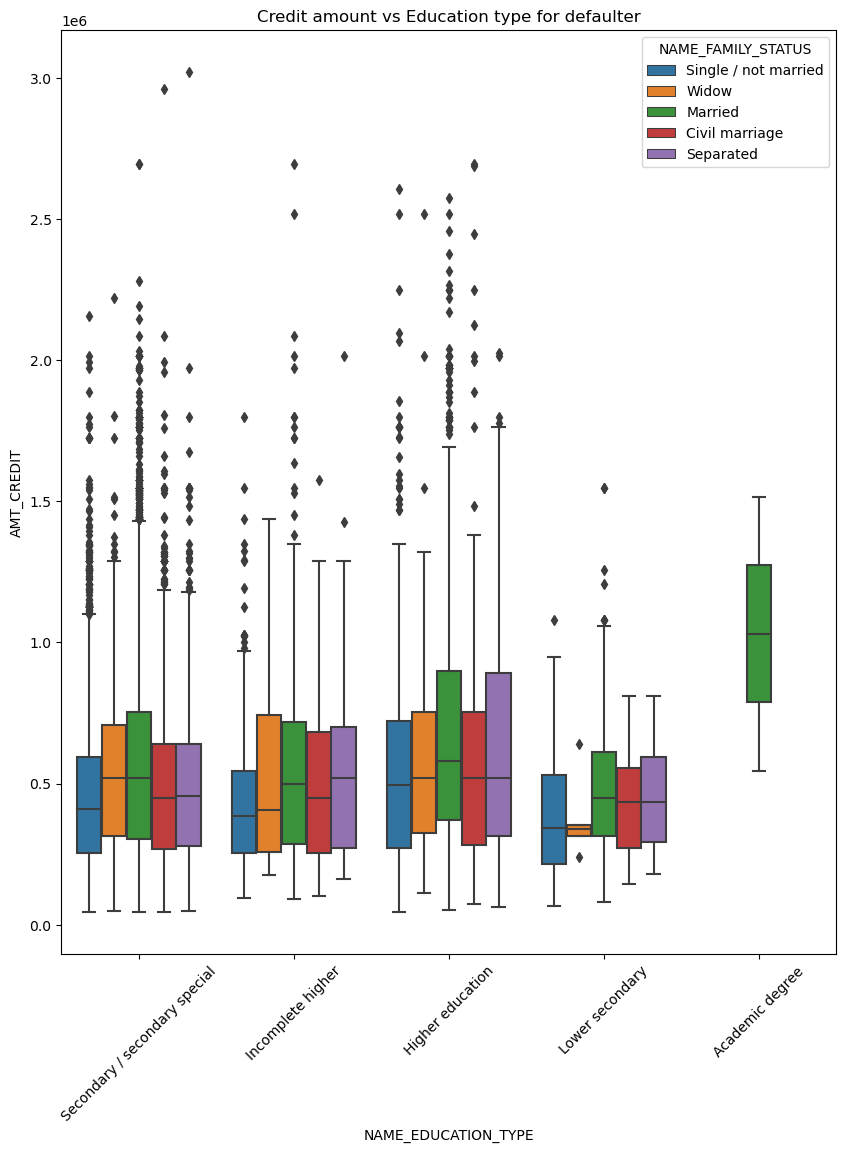

In [490]:
# Education vs Credit amount for target 1

plt.figure(figsize=(10,12))
plt.xticks(rotation=45)
sn.boxplot(data =T1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education type for defaulter')
plt.show()

In [ ]:
#Likewise T0 i.e repayer plot. According to the boxplot above, for the education type "higher education," the income is roughly equal to family status. Academic degrees have fewer outliers, but their income is slightly higher than that of higher education. 
#Lower secondary areas earn less money than other areas.

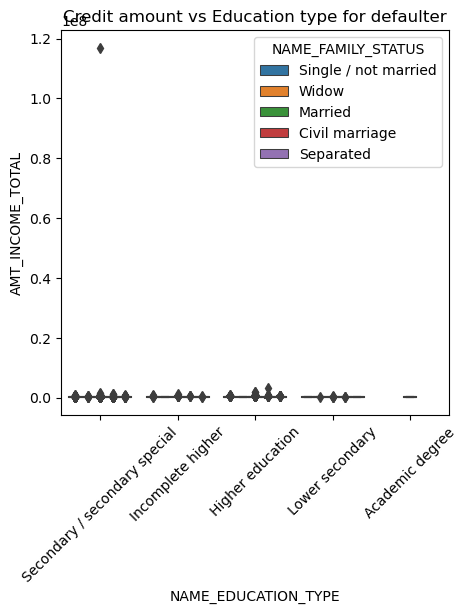

In [493]:
plt.figure(figsize=(5,5))
plt.xticks(rotation=45)
sn.boxplot(data =T1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education type for defaulter')
plt.show()